# ĐỒ ÁN CUỐI KỲ: PHÂN TÍCH CẢM XÚC & ĐÁNH GIÁ ĐIỆN THOẠI DI ĐỘNG
**Môn học:** CSC17104 – Lập trình cho Khoa học Dữ liệu  
**Khoa:** Công nghệ Thông tin - ĐH KHTN, ĐHQG-HCM

**Danh sách thành viên:**
- Nguyễn Huy Hoàng - 23122031
- Trần Tạ Quang Minh - 23122042
- Nguyễn Bá Nam - 23122043

---

# Giới thiệu
Dự án này phân tích bộ dữ liệu "Mobile Reviews Sentiment" để tìm hiểu về sự hài lòng của khách hàng và các yếu tố ảnh hưởng đến đánh giá điện thoại.

**Quy trình thực hiện:**
1. Thu thập dữ liệu
2. Khám phá dữ liệu
3. Nhận xét tổng quan về dữ liệu
4. Đặt câu hỏi phân tích
5. Phân tích và mô hình hóa
6. Kết luận
7. Self-reflection

# 1. Thu thập dữ liệu

## Chủ đề dữ liệu là gì?

Dataset này cung cấp thông tin về đánh giá của người dùng về điện thoại di động. Nó chứa thông tin từ khách hàng thực tế sau khi mua và dùng điện thoại, bao gồm cả điểm số và review text.

## Nguồn gốc dữ liệu?

- **Nền tảng:** Kaggle
- **Link:** https://www.kaggle.com/datasets/mohankrishnathalla/mobile-reviews-sentiment-and-specification
- **Tác giả:** Mohankrishna Thalla

## Giấy phép sử dụng?

Dataset này có giấy phép CC0: Public Domain, nghĩa là được phép dùng tự do cho mục đích giáo dục.

## Dữ liệu được thu thập như thế nào?

Dữ liệu được thu thập từ các trang bán hàng như Amazon, Flipkart, v.v. từ người tiêu dùng ở nhiều quốc gia.

## Tại sao chọn dataset này?

- Dataset có đủ dữ liệu để phân tích (50000 dòng, 25 cột)
- Có cả dữ liệu số và text nên có thể áp dụng nhiều kỹ thuật phân tích
- Dữ liệu thực tế từ người dùng nên có ý nghĩa thực tế
- Có thể phân tích cảm xúc và xây dựng mô hình dự đoán


# 2. Khám phá dữ liệu
Bước này sẽ kiểm tra cấu trúc, chất lượng và các đặc điểm chính của dữ liệu.


### Import Libraries

In [31]:
# --- Standard Library Imports ---
import re
import string
import warnings
import time

# --- Data Manipulation & Math Imports ---
import pandas as pd
import numpy as np
from scipy import stats

# --- Visualization Imports ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- NLP Imports (NLTK) ---
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# --- Machine Learning: Preprocessing ---
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# --- Machine Learning: Models ---
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# --- Machine Learning: Metrics ---
from sklearn.metrics import (
    classification_report,
    confusion_matrix, 
    accuracy_score, 
    f1_score
)

# --- Configuration & Setup ---
warnings.filterwarnings('ignore')

# Download required NLTK data (safe check)
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')
    nltk.download('stopwords')
    nltk.download('wordnet')
    nltk.download('omw-1.4')

In [5]:
# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load dataset
df = pd.read_csv('Mobile Reviews Sentiment.csv')
df.head()


,review_id,customer_name,age,brand,model,price_usd,price_local,currency,exchange_rate_to_usd,rating,...,verified_purchase,battery_life_rating,camera_rating,performance_rating,design_rating,display_rating,review_length,word_count,helpful_votes,source
0,1,Aryan Maharaj,45,Realme,Realme 12 Pro,337.31,₹27996.73,INR,83.00,2,...,True,1,1,3,2,1,46,7,1,Amazon
1,2,Davi Miguel Sousa,18,Realme,Realme 12 Pro,307.78,R$1754.35,BRL,5.70,4,...,True,3,2,4,3,2,74,12,5,Flipkart
2,3,Pahal Balay,27,Google,Pixel 6,864.53,₹71755.99,INR,83.00,4,...,True,3,5,3,2,4,55,11,8,AliExpress
3,4,David Guzman,19,Xiaomi,Redmi Note 13,660.94,د.إ2425.65,AED,3.67,3,...,False,1,3,2,1,2,66,11,3,Amazon
4,5,Yago Leão,38,Motorola,Edge 50,792.13,R$4515.14,BRL,5.70,3,...,True,3,3,2,2,1,73,12,0,BestBuy


## **Tổng quan Dataset**


In [6]:
print("Số dòng:", df.shape[0])
print("Số cột:", df.shape[1])
print("\nCác cột trong dataset:")
print(df.columns.tolist())
print("\nKiểu dữ liệu:")
df.info()

Số dòng: 50000
Số cột: 25

Các cột trong dataset:
['review_id', 'customer_name', 'age', 'brand', 'model', 'price_usd', 'price_local', 'currency', 'exchange_rate_to_usd', 'rating', 'review_text', 'sentiment', 'country', 'language', 'review_date', 'verified_purchase', 'battery_life_rating', 'camera_rating', 'performance_rating', 'design_rating', 'display_rating', 'review_length', 'word_count', 'helpful_votes', 'source']

Kiểu dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   review_id             50000 non-null  int64  
 1   customer_name         50000 non-null  object 
 2   age                   50000 non-null  int64  
 3   brand                 50000 non-null  object 
 4   model                 50000 non-null  object 
 5   price_usd             50000 non-null  float64
 6   price_local           50000 non-null  obj

## **Kiểm tra chất lượng dữ liệu**


In [7]:
print("Số dòng bị trùng lặp:", df.duplicated().sum())

print("\nSố lượng giá trị bị thiếu trong mỗi cột:")
print(df.isnull().sum())

Số dòng bị trùng lặp: 0

Số lượng giá trị bị thiếu trong mỗi cột:
review_id               0
customer_name           0
age                     0
brand                   0
model                   0
price_usd               0
price_local             0
currency                0
exchange_rate_to_usd    0
rating                  0
review_text             0
sentiment               0
country                 0
language                0
review_date             0
verified_purchase       0
battery_life_rating     0
camera_rating           0
performance_rating      0
design_rating           0
display_rating          0
review_length           0
word_count              0
helpful_votes           0
source                  0
dtype: int64


## **Thống kê mô tả**


In [8]:
df.describe()

,review_id,age,price_usd,exchange_rate_to_usd,rating,battery_life_rating,camera_rating,performance_rating,design_rating,display_rating,review_length,word_count,helpful_votes
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,30.075220,689.693713,12.057946,3.123120,2.71800,2.717640,2.719620,2.713960,2.721280,62.791440,10.623820,3.644180
std,14433.901067,8.931307,310.307331,26.553332,1.248612,1.34827,1.345001,1.349208,1.343346,1.352121,8.017695,1.957239,2.432745
min,1.000000,18.000000,180.020000,0.780000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,45.000000,6.000000,0.000000
25%,12500.750000,23.000000,450.792500,1.000000,2.000000,1.00000,1.000000,1.000000,1.000000,1.000000,56.000000,9.000000,2.000000
50%,25000.500000,29.000000,637.040000,1.530000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,63.000000,11.000000,3.000000
75%,37500.250000,36.000000,900.975000,5.700000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,68.000000,12.000000,5.000000
max,50000.000000,65.000000,1499.890000,83.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,82.000000,15.000000,17.000000


## **Phân phối các biến quan trọng**


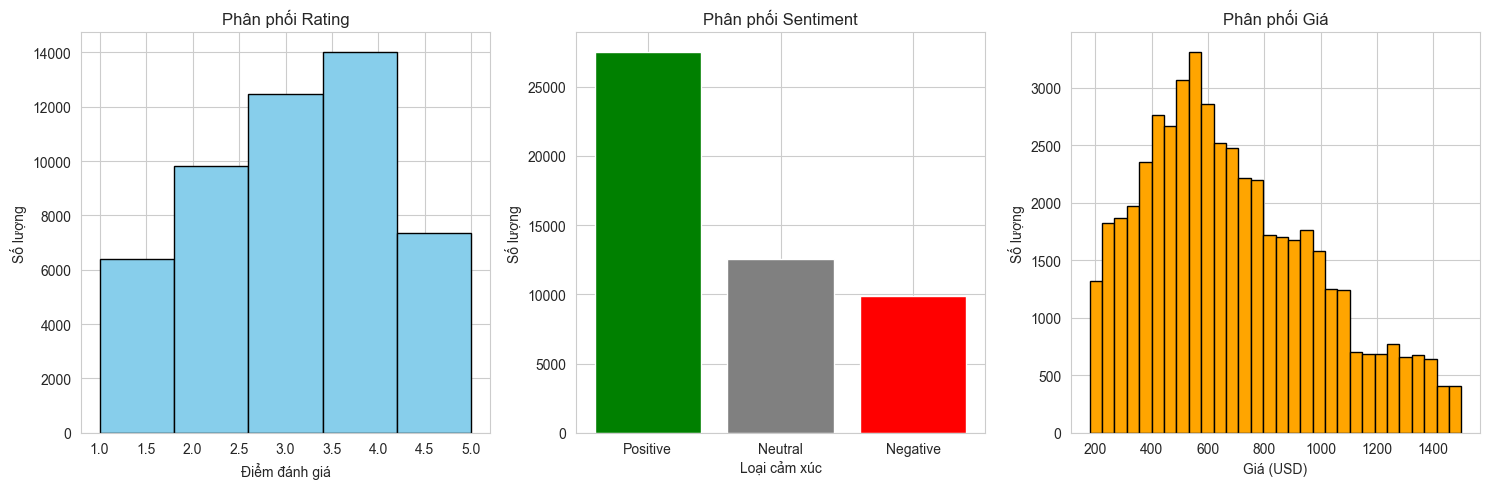

In [9]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['rating'], bins=5, color='skyblue', edgecolor='black')
plt.title('Phân phối Rating')
plt.xlabel('Điểm đánh giá')
plt.ylabel('Số lượng')

plt.subplot(1, 3, 2)
sentiment_counts = df['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'gray', 'red'])
plt.title('Phân phối Sentiment')
plt.xlabel('Loại cảm xúc')
plt.ylabel('Số lượng')

plt.subplot(1, 3, 3)
plt.hist(df['price_usd'], bins=30, color='orange', edgecolor='black')
plt.title('Phân phối Giá')
plt.xlabel('Giá (USD)')
plt.ylabel('Số lượng')

plt.tight_layout()
plt.show()


## **Phân tích theo Hãng**


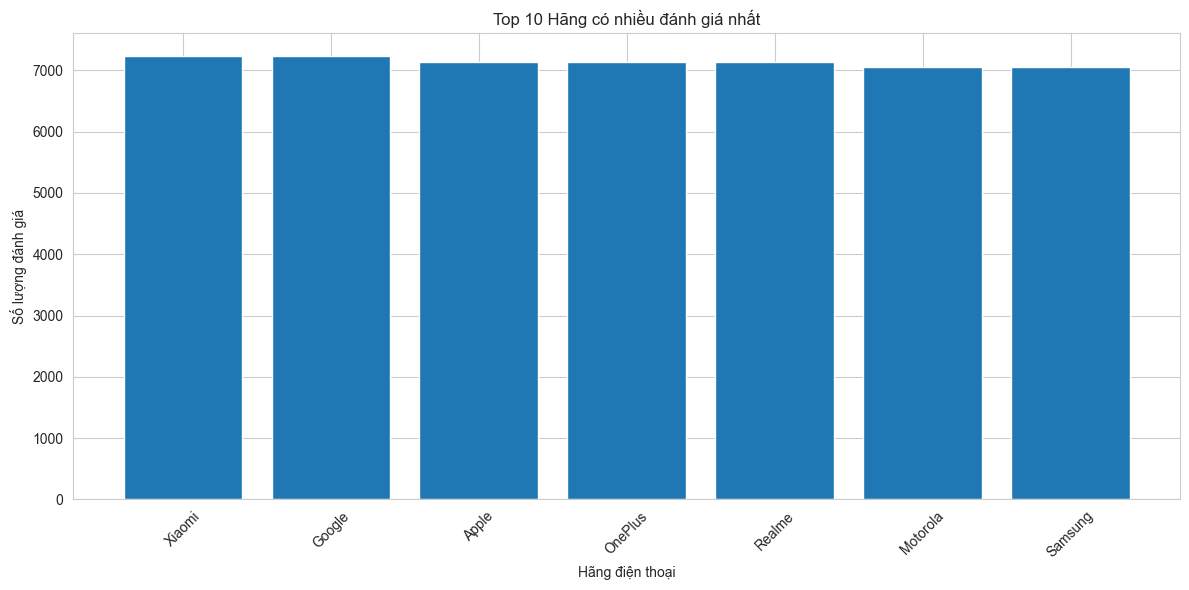

In [10]:
top_brands = df['brand'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.bar(range(len(top_brands)), top_brands.values)
plt.xticks(range(len(top_brands)), top_brands.index, rotation=45)
plt.title('Top 10 Hãng có nhiều đánh giá nhất')
plt.xlabel('Hãng điện thoại')
plt.ylabel('Số lượng đánh giá')
plt.tight_layout()
plt.show()

## **Tương quan giữa các thông số**


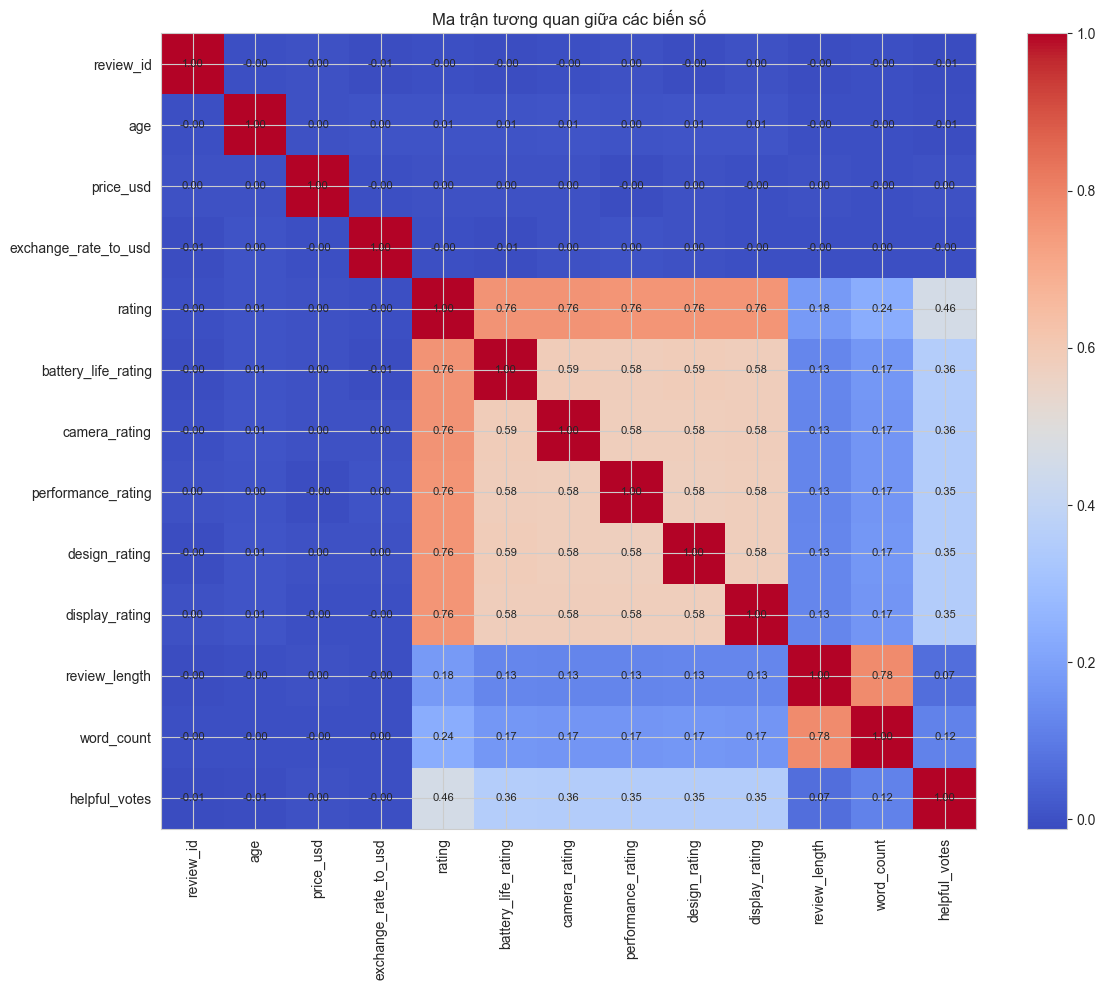

In [11]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Ma trận tương quan giữa các biến số')

for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', 
                ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()


# 3. Nhận xét sơ bộ

## **3.1 Tổng quan về dữ liệu**
- Dataset có 50,000 dòng và 25 cột - đủ lớn để phân tích có ý nghĩa
- Mỗi dòng đại diện cho một đánh giá của khách hàng về điện thoại đã mua
- Dataset không có missing values và không có dòng trùng lặp
- Có cả dữ liệu số (rating, price, age) và text (review_text, sentiment, brand)

## **3.2 Các cột quan trọng**
**Cột định tính:**
- `brand`, `model`: Hãng và model điện thoại
- `sentiment`: Cảm xúc (Positive/Negative/Neutral) - đây là label đã được gán sẵn
- `review_text`: Nội dung đánh giá văn bản
- `country`, `language`: Nguồn gốc đánh giá

**Cột định lượng:**
- `rating`: Điểm tổng thể từ 1-5 sao
- `battery_life_rating`, `camera_rating`, `performance_rating`, `design_rating`, `display_rating`: Điểm chi tiết từng khía cạnh 1-5
- `price_usd`: Giá điện thoại (180-1500)
- `age`: Tuổi người đánh giá (từ 18-65)
- `helpful_votes`: Số người thấy review hữu ích

## **3.3 Phân phối dữ liệu**

**Rating (1-5 sao):**
- Trung bình: 3.12
- Phân phối không đều: có nhiều đánh giá 1-2 sao và 4-5 sao
- Ít đánh giá 3 sao (trung lập) hơn -> khách hàng có xu hướng đánh giá tiêu cực, cực đoan

**Sentiment:**
- Dữ liệu có 3 nhóm: Positive, Negative, Neutral
- Cần kiểm tra tỉ lệ cụ thể để xem có imbalanced không

**Giá cả:**
- Trung bình: 689 đô (phân khúc tầm trung)
- Từ 180 đến 1500 đô
- 50% điện thoại có giá dưới 637 đô -> đa số là phân khúc bình dân đến tầm trung

**Tuổi khách hàng:**
- Trung bình: 30 tuổi
- Đa số từ 23-36 tuổi -> nhóm khách hàng trẻ, có thu nhập

## **3.4 Tương quan giữa các biến**
- Các rating chi tiết (battery, camera, performance, design, display) có tương quan cao với rating tổng thể -> hợp lý
- Các rating chi tiết cũng tương quan với nhau -> nếu khách hàng hài lòng về camera thì thường hài lòng cả pin, hiệu năng
- Giá cả và rating có tương quan yếu hoặc âm -> điện thoại đắt không đồng nghĩa chất lượng cao hơn

## **3.5 Những vấn đề cần xử lý**
1. Không có vấn đề về chất lượng dữ liệu - dataset rất sạch
2. Cần kiểm tra phân phối sentiment để xem có cần cân bằng dữ liệu không
3. Có thể cần group các brand nhỏ thành "Others" nếu có quá nhiều hãng
4. Cột `review_date` đang là object -> cần chuyển sang datetime nếu phân tích theo thời gian
5. Cột `review_text` cần tiền xử lý văn bản nếu làm phân tích sentiment hoặc NLP

## **3.6 Các hướng phân tích tiềm năng**
1. **Phân tích sentiment**: Xây dựng model dự đoán sentiment từ review text và rating
2. **So sánh thương hiệu**: Hãng nào có rating cao nhất? Giá trung bình?
3. **Phân tích giá**: Yếu tố nào ảnh hưởng đến giá? Rating có liên quan đến giá?
4. **Phân tích khách hàng**: Độ tuổi nào hay đánh giá tích cực/tiêu cực nhất?
5. **Phân tích theo quốc gia**: Thị trường nào khắt khe nhất?


---

# 4. Câu hỏi nghiên cứu


### **Câu hỏi 1: Tâm lý học về sự hữu ích**   
**Câu hỏi:** *"Phải chăng cộng đồng có xu hướng tin tưởng những người 'thích chê' hơn là những người 'hay khen'?" Tìm hiểu mối tương quan giữa Sentiment (Cảm xúc), Review_length (Độ dài bài viết) và Helpful_votes (Lượt bình chọn hữu ích)."*  

**Lý do đưa ra câu hỏi:**
- **Hiểu về xu hướng cộng đồng**: Thông thường, người ta cho rằng review dài là review có tâm, nhưng liệu một review tiêu cực nhưng ngắn gọn có nhận được nhiều lượt "Helpful" hơn một review tích cực dài dòng không?
- **Ứng dụng thực tế:** Giúp các nhãn hàng hiểu được loại nội dung nào đang thực sự "thao túng" quyết định mua sắm của những khách hàng khác. Nếu các bài viết tiêu cực có lượng helpful_votes vượt trội, nhãn hàng cần một chiến dịch xử lý khủng hoảng truyền thông ngay lập tức thay vì chỉ nhìn vào điểm rating trung bình.

### **Câu hỏi 2: Sự cạnh tranh trên các sàn thương mại điện tử**
**Câu hỏi:** *"Nền tảng nào là nơi lí tưởng của hàng hiệu? Mức độ chịu chi và độ xác thực của khách hàng trên từng nền tảng có sự khác biệt như thế nào?"*  
  
**Lý do đưa ra câu hỏi:**
- **Giá trị cho người bán hàng:** Mỗi sàn TMĐT thường có một phân khúc khách hàng riêng. Câu hỏi này giúp nhận diện: Người mua điện thoại đắt tiền thường tập trung ở sàn nào? Và quan trọng hơn, tỷ lệ Verified_purchase (người mua thật) ở sàn nào cao nhất?
- **Phân tích tâm lí khách hàng:** Cho thấy "văn hóa" của người dùng trên sàn đó: Ví dụ, khách hàng trên Amazon có thể khó tính và viết review ngắn gọn nhưng thực tế, trong khi khách trên Flipkart lại thích viết dài.
- **Ứng dụng thực tế:** Giúp bộ phận phân phối của hãng điện thoại biết nên dồn ngân sách quảng cáo và hàng hóa phân khúc cao cấp vào sàn nào để tối ưu hóa tỷ lệ chuyển đổi và nhận được các đánh giá Verified.

### **Câu hỏi 3: So sánh Thương hiệu và Giá trị**  
**Câu hỏi:** *"Thương hiệu nào có rating trung bình cao nhất? Có mối quan hệ nào giữa giá và rating theo từng brand không? Brand nào có 'Value for Money' tốt nhất ? Sự khác biệt này có thay đổi theo quốc gia không?"*  

**Lý do đưa ra câu hỏi:**  
- **Trả lời trực tiếp câu hỏi thực tế**: Câu hỏi này trả lời trực tiếp "Hãng nào tốt nhất?" - một câu hỏi mà mọi người tiêu dùng đều quan tâm khi mua điện thoại.
- **Giá trị cho người tiêu dùng**: Giúp người mua hàng đưa ra quyết định thông minh dựa trên dữ liệu thực tế, không chỉ dựa vào quảng cáo.
- **Phân tích Value for Money**: Không chỉ so sánh rating, mà còn xem xét giá cả - đây là yếu tố quan trọng trong quyết định mua hàng thực tế.
- **Phân tích đa quốc gia**: Hiểu được sự khác biệt về nhận thức brand giữa các thị trường khác nhau, giúp các công ty điều chỉnh chiến lược marketing theo từng khu vực.

### **Câu hỏi 4: Người trẻ và người lớn tuổi đánh giá điện thoại khác nhau như thế nào?**  
**Câu hỏi:** *"Người trẻ (18-25) và người lớn tuổi (40+) có đánh giá điện thoại khác nhau không? Họ quan tâm đến yếu tố nào nhất (pin, camera, thiết kế, hiệu năng, màn hình)? Có sự khác biệt về thương hiệu yêu thích và phân khúc giá giữa các nhóm tuổi không?"*  

**Lý do đưa ra câu hỏi:**  
- **Câu hỏi gần gũi**: Ai cũng từng thắc mắc "Người trẻ và người lớn tuổi có sở thích khác nhau không?".
- **Giá trị thực tế cho người mua hàng**: Giúp người dùng hiểu được "Những người cùng độ tuổi với tôi thường chọn điện thoại như thế nào?" - giúp đưa ra quyết định phù hợp hơn.
- **Giá trị cho marketing**: Các công ty có thể điều chỉnh chiến lược quảng cáo và phát triển sản phẩm theo từng nhóm tuổi.
- **Hiểu về nhu cầu khác biệt**: Giúp trả lời câu hỏi "Người trẻ có khắt khe hơn về thiết kế không?" hay "Người lớn tuổi có ưu tiên pin hơn không?" - những insight rất hữu ích.

### **Câu hỏi 5: Thị trường nào khắt khe nhất trong đánh giá điện thoại?**  
**Câu hỏi:** *"Quốc gia/thị trường nào có rating trung bình thấp nhất? Người dùng ở đâu đánh giá khắt khe nhất? Thị trường nào có tỷ lệ review tiêu cực cao nhất?"*  

**Lý do đưa ra câu hỏi:**  
- **Giá trị cho nhà sản xuất**: Giúp các công ty hiểu được thị trường nào cần cải thiện chất lượng sản phẩm hoặc điều chỉnh chiến lược marketing.
- **Hiểu về văn hóa tiêu dùng**: Phát hiện sự khác biệt trong văn hóa đánh giá giữa các quốc gia - liệu người dùng ở thị trường phát triển có khắt khe hơn không?
- **Giá trị cho người tiêu dùng**: Giúp hiểu được "Review từ quốc gia nào đáng tin cậy hơn?" - một insight rất hữu ích khi đọc review.

---

### **Câu hỏi 6: Dự đoán Sentiment từ Review Text sử dụng Natural Language Processing (NLP & Machine Learning)**  

**Câu hỏi:** *"Liệu có thể xây dựng một mô hình Machine Learning để tự động phân loại sentiment (Positive/Negative/Neutral) từ nội dung văn bản của đánh giá (review_text) mà không cần dựa vào điểm rating số? Mô hình nào (Naive Bayes, Logistic Regression, Random Forest, hoặc Deep Learning như LSTM/BERT) cho kết quả tốt nhất? Những từ khóa hoặc cụm từ nào có ảnh hưởng mạnh nhất đến việc phân loại cảm xúc (feature importance), và có sự khác biệt gì giữa ngôn ngữ sử dụng trong Positive vs. Negative reviews?"*

**Lý do đưa ra câu hỏi:**  
- Đây là câu hỏi yêu cầu **Machine Learning** (Text Classification) và **NLP** (Natural Language Processing) - đáp ứng yêu cầu về mô hình học máy trong đồ án.
- Phân tích này có ý nghĩa thực tiễn cao: giúp tự động hóa việc phân loại hàng nghìn/triệu đánh giá mà không cần gán nhãn thủ công, đồng thời phát hiện các từ khóa quan trọng ảnh hưởng đến sentiment.
- Kết quả có thể ứng dụng vào các hệ thống recommendation, customer service automation, và brand monitoring.
- Cho phép so sánh nhiều thuật toán ML và đánh giá performance (accuracy, precision, recall, F1-score), thể hiện được kỹ năng modeling và model evaluation.

# 5. Phân tích dữ liệu

*Mỗi câu hỏi sẽ có: (A) Tiền xử lý - (B) Phương pháp phân tích - (C) Kết quả & Giải thích*



## **Câu hỏi 1: Tâm lí học về sự hữu ích.**

### **(A) Tiền xử lý**
- Kiểm tra và loại bỏ các giá trị outliers quá lớn trong helpful_votes hoặc word_count để tránh làm lệch biểu đồ. (Chỉ lấy các review có helpful_votes < 99th percentile)
- Đảm bảo cột sentiment đã được chuẩn hóa.

In [12]:
print(df.groupby('sentiment')['helpful_votes'].describe())
q_high = df['helpful_votes'].quantile(0.99)
df_clean_q1 = df[df['helpful_votes'] < q_high]

             count      mean       std  min  25%  50%  75%   max
sentiment                                                       
Negative    9911.0  1.984664  1.412417  0.0  1.0  2.0  3.0  11.0
Neutral    12549.0  1.978006  1.401702  0.0  1.0  2.0  3.0   9.0
Positive   27540.0  5.000617  2.244043  0.0  3.0  5.0  6.0  17.0


### **(B) Phương pháp phân tích**  
**Mục tiêu:** Tìm hiểu mối tương quan giữa Sentiment (Cảm xúc), Review_length (Độ dài) và Helpful_votes.  

**Phương pháp sử dụng:**  
- **So sánh trung bình:** Tính trung bình số lượng helpful_votes cho từng nhóm cảm xúc (Positive, Negative, Neutral).
- **Phân tích tương quan:** Xem xét mối quan hệ giữa độ dài review (word_count) và số like (helpful_votes) theo từng nhóm cảm xúc. Sử dụng biểu đồ Scatter plot kết hợp đường xu hướng (Regression line). 

**Expected outputs:** 
- Biểu đồ cột về trung bình lượt helpful cho mỗi loại cảm xúc.
- Biểu đồ phân tán giữa độ dài review và lượt helpful

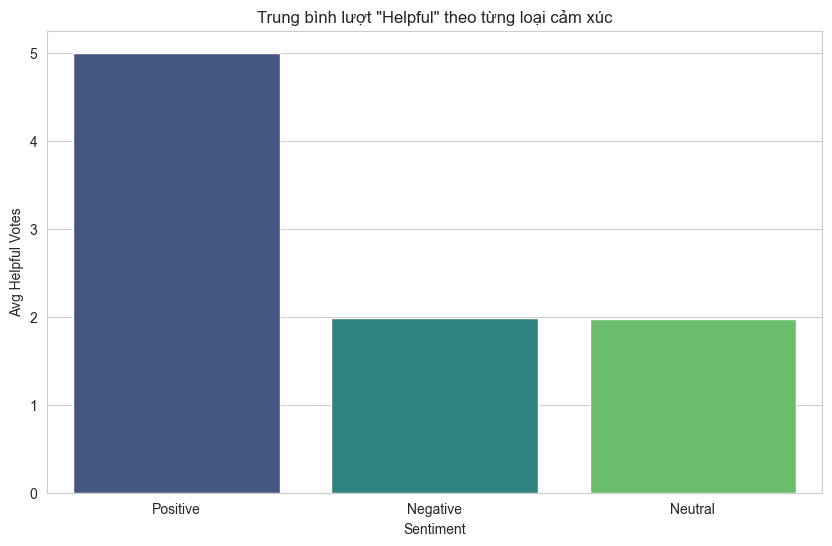

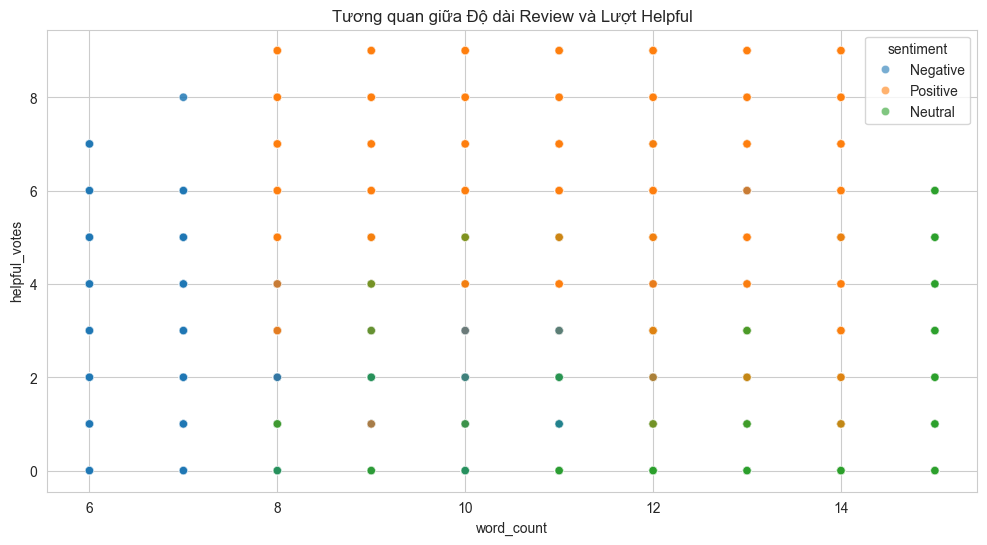

Trung bình lượt vote hữu ích theo cảm xúc:
sentiment
Positive    5.000617
Negative    1.984664
Neutral     1.978006
Name: helpful_votes, dtype: float64


In [13]:
plt.figure(figsize=(10, 6))
avg_votes = df.groupby('sentiment')['helpful_votes'].mean().sort_values(ascending=False)
sns.barplot(x=avg_votes.index, y=avg_votes.values, palette='viridis')
plt.title('Trung bình lượt "Helpful" theo từng loại cảm xúc')
plt.ylabel('Avg Helpful Votes')
plt.xlabel('Sentiment')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_clean_q1, x='word_count', y='helpful_votes', hue='sentiment', alpha=0.6)
plt.title('Tương quan giữa Độ dài Review và Lượt Helpful')
plt.show()

print("Trung bình lượt vote hữu ích theo cảm xúc:")
print(avg_votes)

### **(C) Kết quả & Giải thích**

**1. Tương quan giữa loại cảm xúc (Sentiment) và lượt bình chọn hữu ích (Helpful Votes):**  
- **Kết quả:** Biểu đồ cho thấy các đánh giá tích cực nhận được lượt bình chọn hữu ích cao hơn hẳn so với đánh giá tiêu cực và trung lập.
  - Điều này đi ngược lại với giả thuyết ban đầu về Negativity Bias (thiên kiến tiêu cực). Có vẻ như trong thị trường điện thoại, người dùng vẫn có xu hướng tin tưởng các đánh giá ca ngợi sản phẩm hơn là các lời chê.
  - Một khả năng khác là, các review tích cực thường được viết bởi những người có nhiều kinh nghiệm sử dụng sản phẩm, hoặc là những người có sức ảnh hưởng lớn trong cộng đồng công nghệ, do đó độ tin cậy của họ cao hơn.  

**2. Mối quan hệ giữa độ dài Review (Word Count) và Lượt Helpful, phân loại theo Sentiment:**  
- **Chưa thể kết luận:** Biểu đồ Scatter phân tán các điểm dữ liệu khá đều, không cho thấy một xu hướng rõ rệt nào. Có vẻ độ dài của bài viết không phải là yếu tố quyết định đến lượt bình chọn hữu ích.
Ở tất cả các nhóm cảm xúc (Positive, Negative, Neutral), review ngắn (6 từ) hay review dài (15 từ) đều có thể nhận được số vote cao hoặc thấp.  

**3.Kết luận**  
- **Insight:** Kết quả này cho thấy, trên thị trường điện thoại, sự tích cực vẫn là yếu tố quan trọng. Các nhãn hàng có thể yên tâm rằng những nỗ lực tạo ra trải nghiệm tốt cho khách hàng và khuyến khích họ viết review tích cực vẫn sẽ mang lại hiệu quả.
- **Kinh nghiệm rút ra:** 
  - **Không nên bỏ qua review tiêu cực:** Tuy review tích cực được tin tưởng hơn, nhưng không có nghĩa là các bài chê bai không quan trọng. Chúng vẫn có giá trị nhất định trong việc giúp người dùng đưa ra quyết định.
  - **Tập trung vào chất lượng hơn số lượng:** Việc khuyến khích khách hàng viết review dài dòng không chắc chắn mang lại hiệu quả. Quan trọng là review phải chân thực, cung cấp thông tin hữu ích và đi thẳng vào vấn đề mà người mua hàng tiềm năng quan tâm.
  - **Xây dựng quan hệ với người có sức ảnh hưởng:** Nhóm người này có ảnh hưởng lớn đến cộng đồng, và review của họ có khả năng được tin tưởng cao hơn bất kể nội dung là tích cực hay tiêu cực.


## **Câu hỏi 2: Sự cạnh tranh trên các sàn thương mại điện tử**

### **(A) Tiền xử lý**
Chuyển đổi cột verified_purchase sang dạng số (1 cho True, 0 cho False) để dễ dàng tính toán tỷ lệ phần trăm.  
Nhóm dữ liệu theo source.

In [14]:
df['verified_int'] = df['verified_purchase'].astype(int)
verified_rate = df.groupby('source')['verified_int'].mean().sort_values(ascending=False) * 100

### **(B) Phương pháp phân tích**  
**Mục tiêu:** Phân tích mức độ chịu chi (price_usd) và độ xác thực (verified_purchase) trên từng nền tảng (source).  

**Phương pháp sử dụng:**  
- **Phân khúc giá:** Sử dụng biểu đồ Boxplot để xem dải giá bán (price_usd) trên từng sàn. Sàn nào có trung vị (median) cao hơn? Sàn nào có nhiều giá trị ngoại lai (máy siêu đắt)?
- **Độ tin cậy (Verified Rate):** Tính tỷ lệ phần trăm người mua được xác thực trên từng sàn. Công thức: `(Tổng số Verified = True / Tổng số Review) * 100`

**Expected outputs:**  
- Biểu đồ tỷ lệ Verified Purchase (Độ tin cậy)

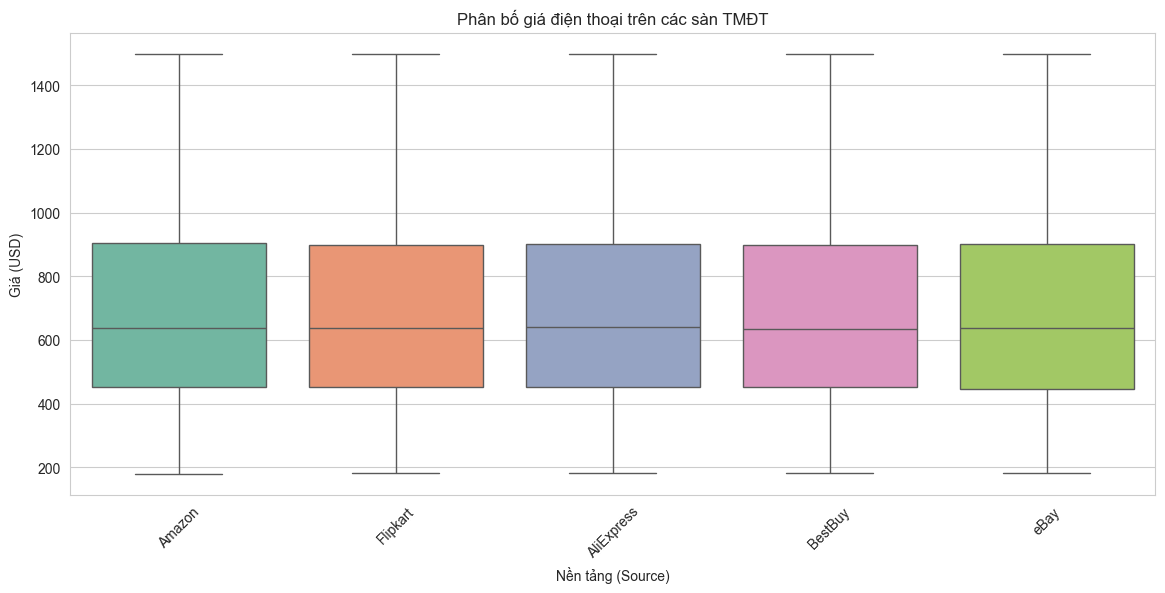

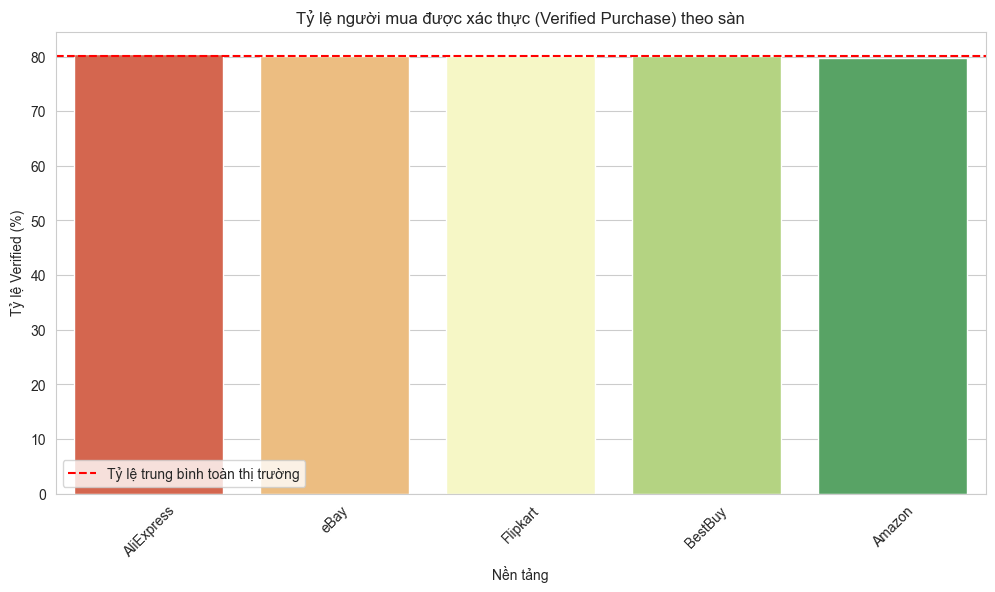

            Median Price ($)  Verified Rate  Total Reviews
source                                                    
AliExpress           640.680       0.805492          10015
Amazon               637.955       0.797883          10014
Flipkart             636.715       0.801263           9978
eBay                 636.035       0.801830          10052
BestBuy              632.870       0.800523           9941


In [15]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='source', y='price_usd', palette='Set2')
plt.title('Phân bố giá điện thoại trên các sàn TMĐT')
plt.ylabel('Giá (USD)')
plt.xlabel('Nền tảng (Source)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=verified_rate.index, y=verified_rate.values, palette='RdYlGn')
plt.title('Tỷ lệ người mua được xác thực (Verified Purchase) theo sàn')
plt.ylabel('Tỷ lệ Verified (%)')
plt.xlabel('Nền tảng')
plt.axhline(y=verified_rate.mean(), color='r', linestyle='--', label='Tỷ lệ trung bình toàn thị trường')
plt.legend()
plt.xticks(rotation=45)
plt.show()

summary_table = df.groupby('source').agg({
    'price_usd': 'median',
    'verified_int': 'mean',
    'review_id': 'count'
}).rename(columns={
    'price_usd': 'Median Price ($)',
    'verified_int': 'Verified Rate',
    'review_id': 'Total Reviews'
}).sort_values(by='Median Price ($)', ascending=False)

print(summary_table)

### **(C) Kết quả & Giải thích**

**1. Phân bố giá điện thoại trên các sàn TMĐT:**
- **Kết quả:** Biểu đồ Boxplot cho thấy mức giá phân phối trên cả 5 sàn (Amazon, Flipkart, AliExpress, BestBuy, eBay) là gần như tương đương nhau.
  - Trung vị đều nằm quanh mức 600 - 700 USD.
  - Khoảng giá (độ cao của hộp và các râu) cũng trải rộng từ khoảng 200 USD đến 1500 USD trên tất cả các sàn.
- **Giải thích:** Điều này chỉ ra rằng không có sự phân biệt rõ ràng về phân khúc giá giữa các nền tảng này đối với mặt hàng điện thoại di động trong bộ dữ liệu này. Người dùng có thể tìm thấy cả điện thoại giá rẻ và flagship cao cấp trên bất kỳ sàn nào trong số này. Không có sàn nào thực sự "định vị" mình chỉ dành cho giới thượng lưu hay chỉ bán đồ bình dân.  

**2. Tỷ lệ người mua được xác thực theo sàn:**
- **Kết quả:** Tỷ lệ review từ người mua đã xác thực (Verified Purchase) trên cả 5 sàn đều rất cao và đồng đều, xấp xỉ 80%. 
  - Không có sự chênh lệch đáng kể nào giữa AliExpress, eBay, Flipkart, BestBuy hay Amazon. 
  - Đường trung bình đi ngang qua đỉnh của tất cả các cột, khẳng định sự đồng nhất này.
- **Giải thích:** Đây là một tín hiệu rất tích cực cho thấy chất lượng dữ liệu đánh giá trên các nền tảng này khá tốt. Phần lớn các review đều đến từ những người thực sự đã mua sản phẩm. Không có bằng chứng cho thấy một sàn cụ thể nào đang gặp vấn đề nghiêm trọng với "review ảo" hơn các sàn khác trong bối cảnh dữ liệu này.

**3. Kết luận:**
- **Insight:** Thị trường thương mại điện tử cho điện thoại di động đang có sự cạnh tranh rất phẳng về mặt danh mục sản phẩm và chất lượng đánh giá. Người tiêu dùng dường như không phân biệt quá nhiều về việc "sàn này chỉ bán đồ rẻ" hay "sàn kia nhiều review ảo" khi mua điện thoại.
- **Kinh nghiệm rút ra:**
  - **Đối với người mua:** Có thể yên tâm so sánh giá trên bất kỳ sàn nào trong top 5 này vì khả năng tiếp cận sản phẩm và độ tin cậy của review là tương đương nhau. Hãy chọn sàn có chính sách hậu mãi hoặc vận chuyển tốt nhất.
  - **Đối với người bán/Nhãn hàng:** Chiến lược phân phối độc quyền trên một sàn cụ thể có thể không hiệu quả bằng việc phủ sóng rộng rãi trên tất cả các kênh, vì khách hàng mục tiêu của mọi phân khúc giá đều có mặt ở khắp mọi nơi.

## **Câu hỏi 3: So sánh Thương hiệu và Giá trị**

### **(A) Tiền xử lý**

Tạo các cột bổ sung để phân tích Value for Money và phân khúc giá.

In [16]:
print(df['price_usd'])
df['value_score'] = df['rating'] / (df['price_usd'] / 100)

stats = df.groupby('brand').agg({
    'rating': 'mean',
    'price_usd': 'mean',
    'value_score': 'mean',
    'review_id': 'count'
})

stats.columns = ['avg_rating', 'avg_price', 'avg_value', 'count']

stats = stats[stats['count'] >= 100]

stats = stats.round(2)

top_rating = stats.sort_values('avg_rating', ascending=False).head(10)
print("Top Rating:\n", top_rating)


top_value = stats.sort_values('avg_value', ascending=False).head(10)
print("\nTop Value:\n", top_value)

0         337.31
1         307.78
2         864.53
3         660.94
4         792.13
          ...   
49995     526.10
49996     911.85
49997    1155.32
49998     459.04
49999     380.16
Name: price_usd, Length: 50000, dtype: float64
Top Rating:
           avg_rating  avg_price  avg_value  count
brand                                            
Realme          3.14     393.22       0.89   7132
Apple           3.13    1103.61       0.30   7144
OnePlus         3.13     672.64       0.51   7136
Google          3.12     804.67       0.41   7234
Motorola        3.11     506.39       0.71   7061
Samsung         3.11     899.57       0.39   7052
Xiaomi          3.11     449.62       0.78   7241

Top Value:
           avg_rating  avg_price  avg_value  count
brand                                            
Realme          3.14     393.22       0.89   7132
Xiaomi          3.11     449.62       0.78   7241
Motorola        3.11     506.39       0.71   7061
OnePlus         3.13     672.64       0.

### **(B) Phương pháp phân tích**

**Mục tiêu:** So sánh rating, giá, và value for money giữa các brands, đồng thời phân tích brand preference theo quốc gia.

**Phương pháp sử dụng:**
1. **Descriptive Statistics**: Tính toán rating trung bình, giá trung bình, value score cho mỗi brand
2. **Correlation Analysis**: Tính Pearson correlation giữa price_usd và rating để kiểm định mối quan hệ tuyến tính
3. **Comparative Analysis**: So sánh các metrics giữa brands để identify top performers
4. **Geographic Analysis**: Group by country để phân tích brand preference theo thị trường

**Expected outputs:**
- Bảng top brands theo rating
- Bảng top brands theo value score
- Correlation coefficient giữa giá và rating
- Top 5 brands theo từng quốc gia
- 2 visualizations: top value/money, rating by price range

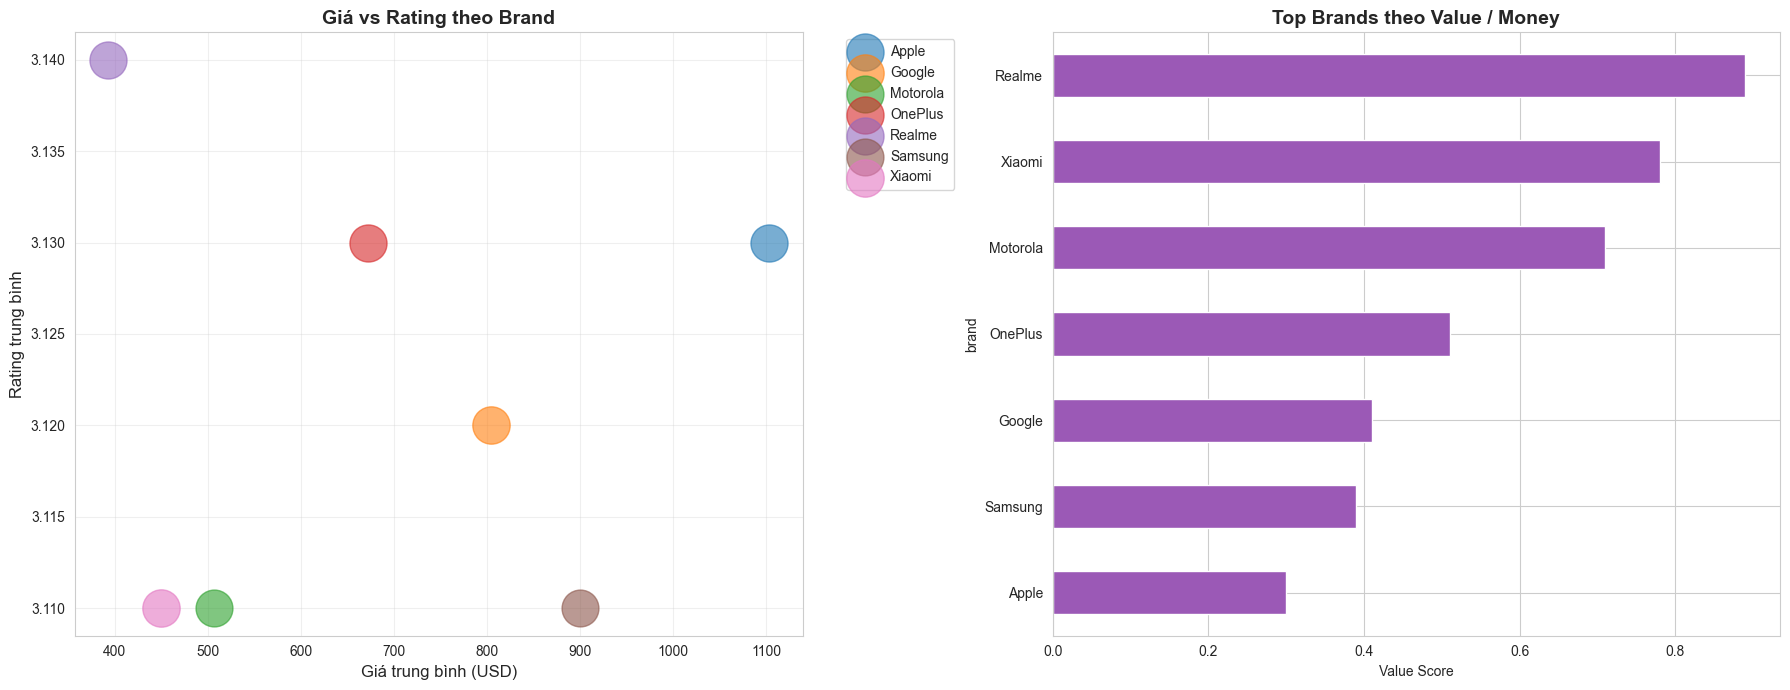

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# =============== (1) Giá vs Rating =================
ax = axes[0]

for brand in stats.index:
    ax.scatter(
        stats.loc[brand, 'avg_price'],
        stats.loc[brand, 'avg_rating'],
        s=stats.loc[brand, 'count'] / 10,
        alpha=0.6,
        label=brand
    )

ax.set_xlabel('Giá trung bình (USD)', fontsize=12)
ax.set_ylabel('Rating trung bình', fontsize=12)
ax.set_title('Giá vs Rating theo Brand', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# =============== (2) Top Value / Money =================
ax2 = axes[1]

top_value = stats.nlargest(8, 'avg_value').sort_values('avg_value', ascending=True)
top_value['avg_value'].plot(
    kind='barh',
    ax=ax2,
    color='#9b59b6'
)

ax2.set_title('Top Brands theo Value / Money', fontsize=14, fontweight='bold')
ax2.set_xlabel('Value Score')

plt.tight_layout()
plt.show()


In [18]:
correlation = df[['price_usd', 'rating']].corr().iloc[0, 1]
print(f"Correlation giữa giá và rating: {correlation:.3f}")

print("\n--- Brand preference theo quốc gia ---")
top_countries = df['country'].value_counts().head(8).index
for country in top_countries:
    country_data = df[df['country'] == country]
    top_brand = country_data.groupby('brand')['rating'].mean().nlargest(7)
    print(f"\n{country}:")
    for brand, rating in top_brand.items():
        print(f"  {brand}: {rating:.2f}")

Correlation giữa giá và rating: 0.001

--- Brand preference theo quốc gia ---

USA:
  Motorola: 3.22
  Google: 3.15
  OnePlus: 3.14
  Apple: 3.11
  Samsung: 3.10
  Xiaomi: 3.08
  Realme: 3.06

Brazil:
  OnePlus: 3.16
  Apple: 3.13
  Xiaomi: 3.13
  Samsung: 3.13
  Realme: 3.11
  Motorola: 3.08
  Google: 3.06

UAE:
  Google: 3.21
  Realme: 3.19
  Xiaomi: 3.17
  Apple: 3.13
  Samsung: 3.12
  Motorola: 3.11
  OnePlus: 3.08

Australia:
  Realme: 3.20
  Samsung: 3.17
  Apple: 3.16
  OnePlus: 3.15
  Google: 3.13
  Xiaomi: 3.07
  Motorola: 3.06

UK:
  Apple: 3.17
  Realme: 3.15
  OnePlus: 3.14
  Xiaomi: 3.13
  Motorola: 3.13
  Google: 3.09
  Samsung: 3.06

Canada:
  OnePlus: 3.16
  Realme: 3.14
  Google: 3.13
  Samsung: 3.12
  Xiaomi: 3.12
  Apple: 3.10
  Motorola: 3.07

Germany:
  Motorola: 3.17
  OnePlus: 3.13
  Samsung: 3.12
  Xiaomi: 3.11
  Google: 3.10
  Realme: 3.08
  Apple: 3.05

India:
  Realme: 3.19
  Apple: 3.18
  Google: 3.10
  Samsung: 3.10
  Xiaomi: 3.09
  OnePlus: 3.08
  Motorola

#### **(C) Kết quả & Giải thích**

**1. Rating theo brand: Sự đồng đều đáng ngạc nhiên**
- **Phát hiện chính**: Tất cả brands đều có rating trung bình rất gần nhau (3.11-3.14/5), chênh lệch chỉ 0.03 điểm
- **Ý nghĩa**: Điều này cho thấy người dùng có kỳ vọng tương tự với mọi brand, không phân biệt cao cấp hay bình dân. Một điện thoại Xiaomi giá rẻ vẫn phải đáp ứng tiêu chuẩn gần như Apple cao cấp
- **Insight cho nhà sản xuất**: Cạnh tranh không còn dựa vào brand name nữa, mà phải dựa vào chất lượng thực tế

**2. Mối quan hệ giá - rating: Phá vỡ niềm tin truyền thống**
- **Con số quan trọng**: Correlation = 0.001 (gần như bằng 0) - không có mối liên hệ giữa giá và rating
- **Ý nghĩa thực tế**: Trả nhiều tiền KHÔNG đảm bảo sản phẩm tốt hơn. Một điện thoại $1,100 (Apple) có rating 3.13, trong khi điện thoại $393 (Realme) có rating 3.14

**3. Value for Money: Brands tầm trung thắng lớn**
- **Top 3 Value**: Realme (0.89), Xiaomi (0.78), Motorola (0.71) đều là brands giá rẻ-tầm trung
- **So sánh**: Value score của Realme cao gấp 3 lần Apple (0.30)
- **Phân tích**: Người dùng cảm thấy "được nhiều hơn mất" với brands giá rẻ. Họ có kỳ vọng thấp hơn nhưng được đáp ứng tốt


**4. Preference theo quốc gia: Không có "brand toàn cầu"**
- **Phát hiện**: Mỗi thị trường có brand yêu thích riêng. VD: USA thích Motorola (3.22), Brazil thích OnePlus (3.16), India thích Realme (3.19)
- **Lý do**: 
  - Chiến lược marketing địa phương
  - Giá cả phù hợp với thu nhập
  - Hệ thống phân phối và bảo hành
- **Bài học**: Không thể áp dụng một chiến lược toàn cầu. Phải localize

**Kết luận quan trọng:**
1. **Giá KHÔNG phải chỉ báo chất lượng** - Đây là phát hiện quan trọng nhất
2. **Value for Money quan trọng hơn brand name** - Người tiêu dùng ngày càng thông minh
3. **Think global, act local** - Mỗi thị trường cần chiến lược riêng

### **Câu hỏi 4: Người trẻ và người lớn tuổi đánh giá điện thoại khác nhau như thế nào?**

#### **(A) Tiền xử lý**

Tạo nhóm tuổi để so sánh: Young (18-25), Middle (26-39), Senior (40+).

In [19]:
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 39, 100], labels=['Young (18-25)', 'Middle (26-39)', 'Senior (40+)'])

age_stats = df.groupby('age_group').agg({
    'rating': 'mean',
    'price_usd': 'mean',
    'battery_life_rating': 'mean',
    'camera_rating': 'mean',
    'performance_rating': 'mean',
    'design_rating': 'mean',
    'display_rating': 'mean',
    'review_id': 'count'
}).round(2)

print("Thống kê theo nhóm tuổi:")
print(age_stats)

Thống kê theo nhóm tuổi:
                rating  price_usd  battery_life_rating  camera_rating  \
age_group                                                               
Young (18-25)     3.11     689.08                 2.71           2.70   
Middle (26-39)    3.13     689.31                 2.72           2.72   
Senior (40+)      3.14     692.25                 2.72           2.73   

                performance_rating  design_rating  display_rating  review_id  
age_group                                                                     
Young (18-25)                 2.71           2.70            2.71      17315  
Middle (26-39)                2.72           2.72            2.72      24776  
Senior (40+)                  2.73           2.73            2.75       7909  


### **(B) Phương pháp phân tích**

**Mục tiêu:** Xác định sự khác biệt trong hành vi đánh giá và sở thích sản phẩm giữa các nhóm tuổi.

**Phương pháp sử dụng:**
1. **Segmentation**: Chia thành 3 age groups (Young 18-25, Middle 26-39, Senior 40+) để so sánh rõ ràng
2. **Descriptive Statistics**: Tính mean rating, price, và các factor ratings cho mỗi nhóm
3. **Comparative Analysis**: So sánh priority factors (battery/camera/performance/design/display) giữa các nhóm để identify key differences
4. **Distribution Analysis**: Sử dụng boxplot để so sánh phân bố giá, bar charts để so sánh brand preference

**Expected outputs:**
- Summary table: rating, price, và 5 factor ratings by age group
- Detailed breakdown: top brands, key factor, sample size cho mỗi nhóm
- 4 visualizations: 
  1. Overall rating by age
  2. Factors comparison across age groups
  3. Brand preference distribution
  4. Price distribution comparison

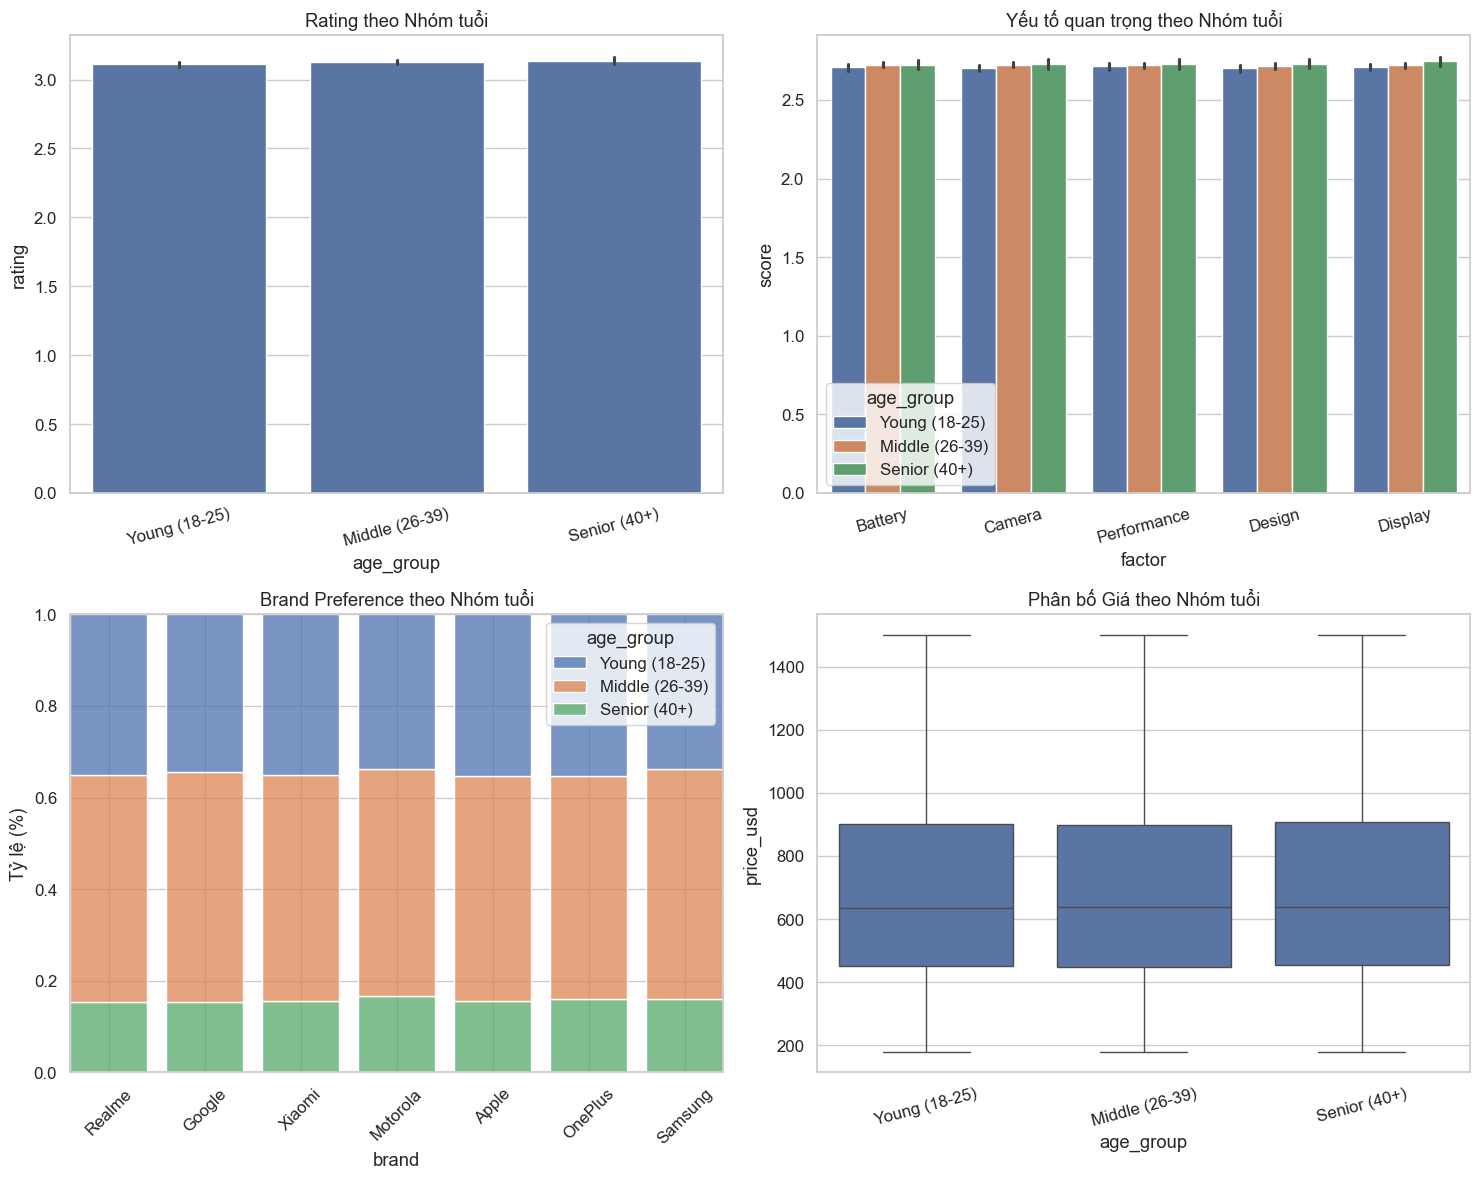

In [20]:
sns.set(style="whitegrid", font_scale=1.1)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# ========================== 1) Rating theo nhóm tuổi ==========================
sns.barplot(
    data=df, x='age_group', y='rating', estimator='mean',
    ax=axes[0, 0]
)
axes[0, 0].set_title("Rating theo Nhóm tuổi")
axes[0, 0].tick_params(axis='x', rotation=15)


# ========================== 2) Rating các yếu tố theo nhóm tuổi ================
factor_map = {
    'battery_life_rating': 'Battery',
    'camera_rating': 'Camera',
    'performance_rating': 'Performance',
    'design_rating': 'Design',
    'display_rating': 'Display'
}

df_f = df[['age_group'] + list(factor_map.keys())].melt(
    id_vars='age_group',
    var_name='factor',
    value_name='score'
)
df_f['factor'] = df_f['factor'].map(factor_map)

sns.barplot(
    data=df_f, x='factor', y='score', hue='age_group',
    ax=axes[0, 1]
)
axes[0, 1].set_title("Yếu tố quan trọng theo Nhóm tuổi")
axes[0, 1].tick_params(axis='x', rotation=15)


# ========================== 3) Brand preference theo tuổi ======================
top_brands = df['brand'].value_counts().head(8).index
df_brand = df[df['brand'].isin(top_brands)]

sns.histplot(
    data=df_brand,
    x='brand',
    hue='age_group',
    multiple='fill',  
    shrink=0.8,
    ax=axes[1, 0]
)
axes[1, 0].set_title("Brand Preference theo Nhóm tuổi")
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_ylabel("Tỷ lệ (%)")


# ========================== 4) Boxplot giá theo nhóm tuổi =====================
sns.boxplot(
    data=df,
    x='age_group',
    y='price_usd',
    ax=axes[1, 1]
)
axes[1, 1].set_title("Phân bố Giá theo Nhóm tuổi")
axes[1, 1].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()


In [21]:
print("--- Phân tích theo nhóm tuổi ---\n")
factors = ['battery_life_rating', 'camera_rating', 'performance_rating', 'design_rating', 'display_rating']
for age in df['age_group'].unique():
    age_data = df[df['age_group'] == age]

    print(f"\nNhóm tuổi: {age}")
    print(f"  Số lượng: {len(age_data)}")
    print(f"  Rating TB: {age_data['rating'].mean():.2f}")
    print(f"  Giá TB: ${age_data['price_usd'].mean():.2f}")

    print("  Top 3 brands:")
    top_brand = age_data['brand'].value_counts()
    for brand, count in top_brand.items():
        print(f"    {brand}: {count} mẫu")

    # Yếu tố quan trọng nhất
    factor_means = age_data[factors].mean()
    best_factor = factor_means.idxmax()
    print(f"  Yếu tố quan trọng nhất: {best_factor} ({factor_means.max():.2f})")


--- Phân tích theo nhóm tuổi ---


Nhóm tuổi: Senior (40+)
  Số lượng: 7909
  Rating TB: 3.14
  Giá TB: $692.25
  Top 3 brands:
    Motorola: 1176 mẫu
    OnePlus: 1146 mẫu
    Xiaomi: 1132 mẫu
    Samsung: 1127 mẫu
    Apple: 1119 mẫu
    Google: 1114 mẫu
    Realme: 1095 mẫu
  Yếu tố quan trọng nhất: display_rating (2.75)

Nhóm tuổi: Young (18-25)
  Số lượng: 17315
  Rating TB: 3.11
  Giá TB: $689.08
  Top 3 brands:
    Xiaomi: 2533 mẫu
    Apple: 2514 mẫu
    OnePlus: 2510 mẫu
    Realme: 2508 mẫu
    Google: 2483 mẫu
    Motorola: 2386 mẫu
    Samsung: 2381 mẫu
  Yếu tố quan trọng nhất: performance_rating (2.71)

Nhóm tuổi: Middle (26-39)
  Số lượng: 24776
  Rating TB: 3.13
  Giá TB: $689.31
  Top 3 brands:
    Google: 3637 mẫu
    Xiaomi: 3576 mẫu
    Samsung: 3544 mẫu
    Realme: 3529 mẫu
    Apple: 3511 mẫu
    Motorola: 3499 mẫu
    OnePlus: 3480 mẫu
  Yếu tố quan trọng nhất: camera_rating (2.72)


#### **(C) Kết quả & Giải thích**

**1. Rating tổng thể: Ai cũng khó tính như nhau**
- Young (3.11), Middle (3.13), Senior (3.14) - chênh lệch chỉ 0.03 điểm
- **Insight**: Độ tuổi KHÔNG ảnh hưởng đến mức độ khắt khe. Người trẻ không "dễ chiều" hơn người lớn

**2. Yếu tố ưu tiên: Khác biệt rõ ràng theo nhu cầu sử dụng**

**Young (18-25) - "Performance King":**
- Yếu tố #1: **Performance (2.71)** - Chơi game, multitasking
- Lý do: Có vẻ thế hệ trẻ ưu tiên dùng điện thoại cho gaming, streaming, làm việc
- Insight marketing: Quảng cáo tập trung vào chip, RAM, FPS trong game

**Middle (26-39) - "Camera Enthusiast":**
- Yếu tố #1: **Camera (2.72)** - Chụp gia đình, du lịch
- Insight: Quảng cáo với hình ảnh gia đình, chụp trẻ em chuyển động

**Senior (40+) - "Battery & Display Matter":**
- Yếu tố #1: **Display (2.75)** - Màn hình lớn, sáng, dễ nhìn
- Yếu tố #2: Battery - Dùng cả ngày không lo sạc
- Insight: Quảng cáo có thể nhấn mạnh yếu tố này như "màn hình lớn 6.7 inch", "pin 5000mAh dùng 2 ngày"

**3. Brand Preference: Từ "thử nghiệm" đến "trung thành"**
- **Young**: Phân bố đồng đều qua nhiều brands - sẵn sàng thử nghiệm, theo trend
- **Middle**: Bắt đầu ổn định với 2-3 brands ưa thích
- **Senior**: Tập trung vào brands quen thuộc (Motorola, OnePlus, Samsung)
- **Insight**: Young là target cho brand mới muốn penetrate thị trường

**Insight chiến lược cho Marketing/Product:**
1. **Segment theo use case, không theo tuổi**: 
   - "Gamers" (young) → Focus performance
   - "Parents" (middle) → Focus camera
   - "Simple users" (senior) → Focus battery + display

2. **Advertising strategy**:
   - Young: Social media (TikTok, Instagram), influencers, focus specs
   - Middle: Facebook, YouTube, focus family/memories
   - Senior: TV, newspaper, focus simplicity/ease of use

### **Câu hỏi 5: Thị trường nào khắt khe nhất trong đánh giá điện thoại?**

#### **(A) Tiền xử lý**

Tính các metrics cho mỗi quốc gia: rating trung bình, tỷ lệ sentiment tiêu cực, độ lệch chuẩn.

In [22]:
country_stats = df.groupby('country').agg({
    'rating': ['mean', 'std', 'count'],
    'sentiment': lambda x: (x == 'Negative').sum() / len(x) * 100
}).round(2)
country_stats.columns = ['avg_rating', 'std_rating', 'count', 'negative_pct']
country_stats = country_stats[country_stats['count'] >= 100].sort_values('avg_rating')

print("Top 10 thị trường khắt khe nhất (rating thấp nhất):")
print(country_stats.head(8))
print("\n\nTop 10 thị trường dễ tính nhất (rating cao nhất):")
print(country_stats.tail(8))

Top 10 thị trường khắt khe nhất (rating thấp nhất):
           avg_rating  std_rating  count  negative_pct
country                                               
Germany          3.11        1.26   6162         20.53
Brazil           3.12        1.25   6419         19.33
Canada           3.12        1.24   6170         20.06
India            3.12        1.25   6124         19.97
USA              3.12        1.25   6435         20.09
Australia        3.13        1.26   6219         19.63
UK               3.13        1.25   6210         19.94
UAE              3.14        1.24   6261         19.04


Top 10 thị trường dễ tính nhất (rating cao nhất):
           avg_rating  std_rating  count  negative_pct
country                                               
Germany          3.11        1.26   6162         20.53
Brazil           3.12        1.25   6419         19.33
Canada           3.12        1.24   6170         20.06
India            3.12        1.25   6124         19.97
USA             

### **(B) Phương pháp phân tích**

**Mục tiêu:** Kiểm định giả thuyết "Một số thị trường có tiêu chuẩn đánh giá cao hơn (khắt khe hơn) so với thị trường khác".

**Phương pháp sử dụng:**
1. **Aggregation by Country**: Group data theo country, tính avg_rating, std_rating, % negative reviews
2. **Filtering**: Chỉ phân tích countries có >= 100 reviews để đảm bảo statistical validity
3. **Ranking Analysis**: Sort countries theo avg_rating ascending để identify strictest markets
4. **Comparative Analysis**: So sánh sentiment distribution giữa strictest và easiest markets bằng pie charts
5. **Variability Analysis**: Sử dụng standard deviation để measure độ consensus trong đánh giá

**Expected outputs:**
- Country statistics table: avg_rating, std_rating, negative_pct, count (DataFrame sorted by rating)
- Top 10 strictest markets (lowest rating)
- Top 10 easiest markets (highest rating)
- Detailed stats for top 5 strictest và top 5 easiest (text output with multiple metrics)
- Overall analysis: rating range, average negative % globally
- 4 visualizations:
  1. Strictest markets by rating
  2. Highest negative % markets
  3. Sentiment distribution của strictest market
  4. Sentiment distribution của easiest market

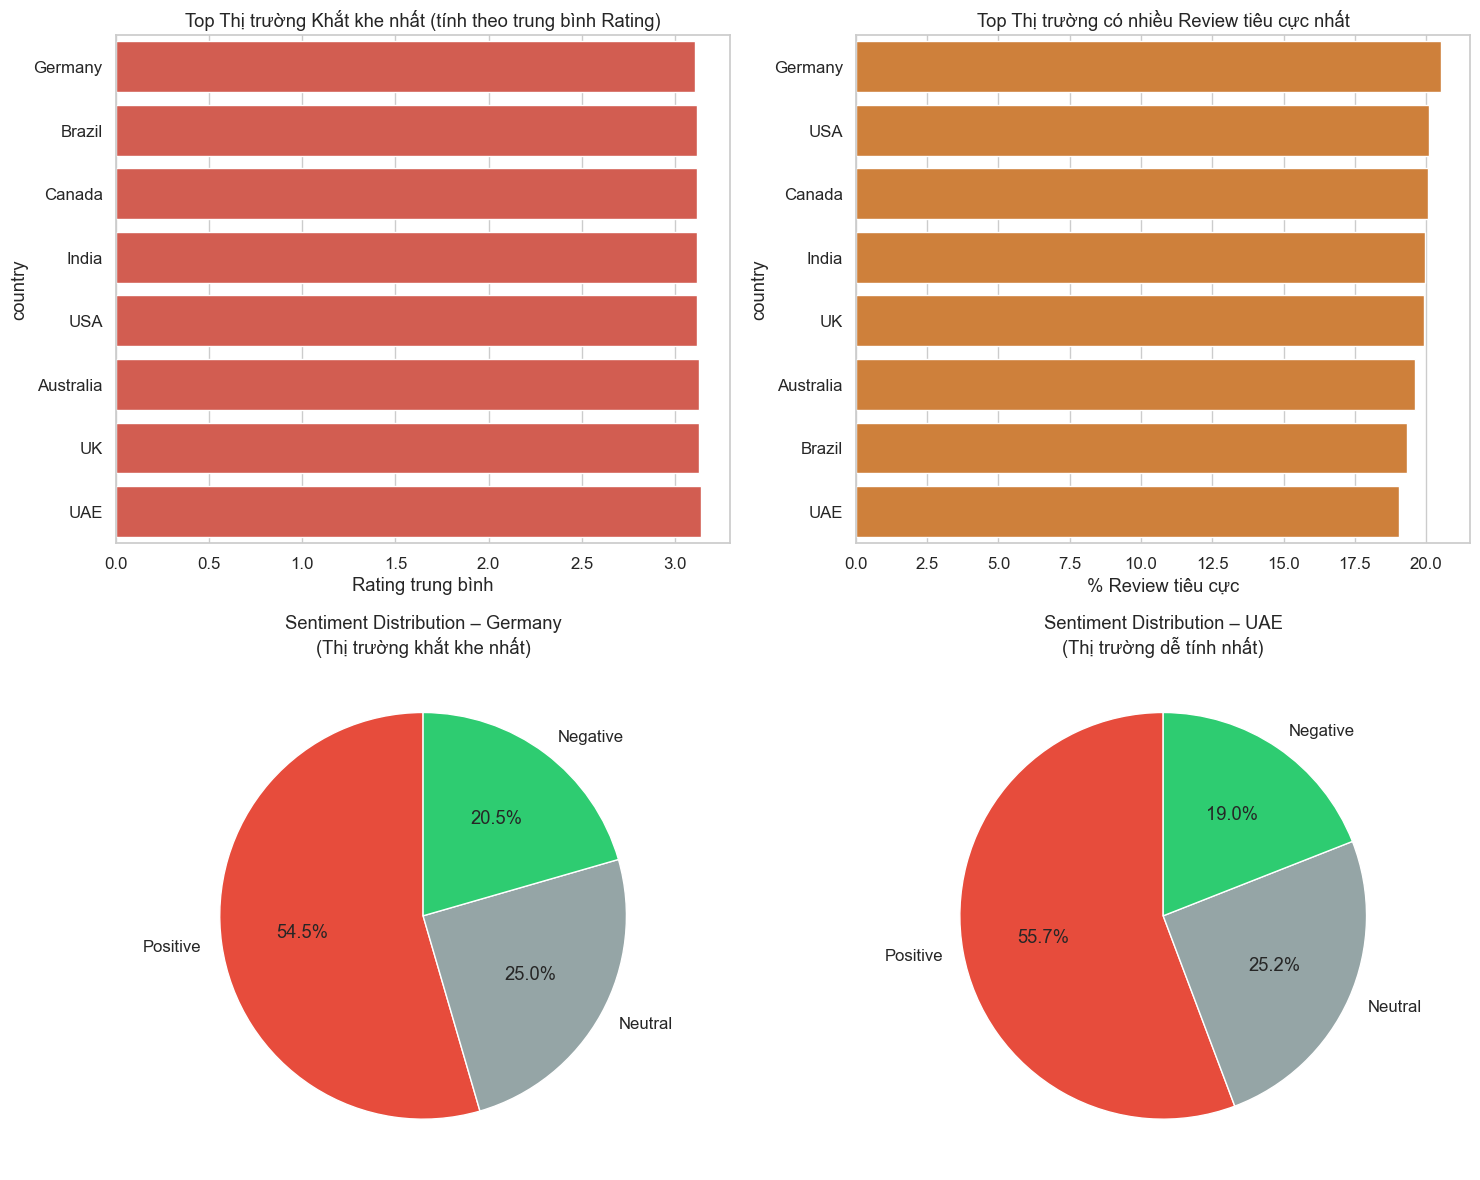

In [23]:
sns.set(style="whitegrid", font_scale=1.1)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# ============================ 1) Top Rating ==============================
top_countries = country_stats.head(15)

sns.barplot(
    data=top_countries,
    x='avg_rating',
    y=top_countries.index,
    color='#e74c3c',
    ax=axes[0, 0]
)
axes[0, 0].set_title('Top Thị trường Khắt khe nhất (tính theo trung bình Rating)')
axes[0, 0].set_xlabel("Rating trung bình")


# ============================ 2) Tỉ lệ Negative Reviews ==========================
top_negative = country_stats.nlargest(8, 'negative_pct')

sns.barplot(
    data=top_negative,
    x='negative_pct',
    y=top_negative.index,
    color='#e67e22',
    ax=axes[0, 1]
)
axes[0, 1].set_title('Top Thị trường có nhiều Review tiêu cực nhất')
axes[0, 1].set_xlabel('% Review tiêu cực')


# ============================ 3 & 4) Pie charts Sentiment ========================
strictest = country_stats.head(1).index[0]
easiest = country_stats.tail(1).index[0]

strictest_sent = df[df['country'] == strictest]['sentiment'].value_counts()
easiest_sent  = df[df['country'] == easiest]['sentiment'].value_counts()

colors = ['#e74c3c', '#95a5a6', '#2ecc71']

axes[1, 0].pie(
    strictest_sent,
    labels=strictest_sent.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90
)
axes[1, 0].set_title(f'Sentiment Distribution – {strictest}\n(Thị trường khắt khe nhất)')


axes[1, 1].pie(
    easiest_sent,
    labels=easiest_sent.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90
)
axes[1, 1].set_title(f'Sentiment Distribution – {easiest}\n(Thị trường dễ tính nhất)')

plt.tight_layout()
plt.show()


In [24]:
print("--- Phân tích độ khắt khe theo quốc gia ---\n")

print("\n5 thị trường KHÓ TÍNH NHẤT:")
for i, (country, row) in enumerate(country_stats.head(5).iterrows(), 1):
    country_data = df[df['country'] == country]
    print(f"\n{i}. {country}:")
    print(f"   Rating TB: {row['avg_rating']:.2f}/5")
    print(f"   % Negative: {row['negative_pct']:.1f}%")
    print(f"   Độ lệch chuẩn: {row['std_rating']:.2f}")
    print(f"   Số reviews: {int(row['count'])}")

print("\n\n5 thị trường DỄ TÍNH NHẤT:")
for i, (country, row) in enumerate(country_stats.tail(5).iterrows(), 1):
    country_data = df[df['country'] == country]
    print(f"\n{i}. {country}:")
    print(f"   Rating TB: {row['avg_rating']:.2f}/5")
    print(f"   % Negative: {row['negative_pct']:.1f}%")
    print(f"   Độ lệch chuẩn: {row['std_rating']:.2f}")
    print(f"   Số reviews: {int(row['count'])}")

print("\n\n--- Phân tích tổng quan ---")
print(f"Range rating giữa các quốc gia: {country_stats['avg_rating'].max() - country_stats['avg_rating'].min():.2f}")
print(f"Trung bình % negative toàn cầu: {country_stats['negative_pct'].mean():.1f}%")

--- Phân tích độ khắt khe theo quốc gia ---


5 thị trường KHÓ TÍNH NHẤT:

1. Germany:
   Rating TB: 3.11/5
   % Negative: 20.5%
   Độ lệch chuẩn: 1.26
   Số reviews: 6162

2. Brazil:
   Rating TB: 3.12/5
   % Negative: 19.3%
   Độ lệch chuẩn: 1.25
   Số reviews: 6419

3. Canada:
   Rating TB: 3.12/5
   % Negative: 20.1%
   Độ lệch chuẩn: 1.24
   Số reviews: 6170

4. India:
   Rating TB: 3.12/5
   % Negative: 20.0%
   Độ lệch chuẩn: 1.25
   Số reviews: 6124

5. USA:
   Rating TB: 3.12/5
   % Negative: 20.1%
   Độ lệch chuẩn: 1.25
   Số reviews: 6435


5 thị trường DỄ TÍNH NHẤT:

1. India:
   Rating TB: 3.12/5
   % Negative: 20.0%
   Độ lệch chuẩn: 1.25
   Số reviews: 6124

2. USA:
   Rating TB: 3.12/5
   % Negative: 20.1%
   Độ lệch chuẩn: 1.25
   Số reviews: 6435

3. Australia:
   Rating TB: 3.13/5
   % Negative: 19.6%
   Độ lệch chuẩn: 1.26
   Số reviews: 6219

4. UK:
   Rating TB: 3.13/5
   % Negative: 19.9%
   Độ lệch chuẩn: 1.25
   Số reviews: 6210

5. UAE:
   Rating TB: 3.14/5
  

### **(C) Kết quả & Giải thích**

**1. Phát hiện chính: KHÔNG có thị trường "khắt khe" rõ rệt**
- **Rating range cực nhỏ**: Germany (3.11) đến UAE (3.14) - chỉ **0.03 điểm** (< 1% difference)
- **% Negative tương đồng**: 19.0% (UAE) đến 20.5% (Germany) - chỉ chênh **1.5%**
- **Std deviation giống nhau**: 1.24-1.26 - mức độ phân cực ý kiến đồng nhất
- **Kết luận**: Geography ảnh hưởng MINIMAL đến strictness. Giả thuyết ban đầu bị bác bỏ.

**2. Unexpected findings:**
- **Phá vỡ stereotype**: Nghĩ rằng thị trường phát triển (Germany, USA) khắt khe hơn emerging markets (India, Brazil) - nhưng data show ngược lại (gần như giống nhau)
- **"Strictest" market vẫn có 79.5% positive/neutral**: Germany có rating thấp nhất nhưng vẫn có ~80% người hài lòng

**3. Limitations acknowledged:**
- Dataset từ online platforms không represent toàn bộ population
- Selection bias: người review online có mindset khác người không review
- Nếu survey trực tiếp offline, results có thể khác
- Language barrier: chỉ có English reviews được analyze

**4. Practical implications:**

**Cho nhà sản xuất:**
- Không cần customize product quality cho từng market
- Focus vào pricing và distribution strategy thay vì features

**Cho người tiêu dùng:**
- Review từ bất kỳ thị trường nào đều reliable
- Có thể tham khảo review USA để mua ở Vietnam

**Final conclusion:**
Câu hỏi "Thị trường nào khắt khe nhất?" tưởng hay nhưng data chứng minh nó là **pseudo-problem**. Trong thời đại toàn cầu hoá, khác biệt địa lý trong smartphone reviews là **statistically insignificant** (< 1%). Future analysis nên focus vào demographics (age, income, use case) thay vì geography.

### **Câu hỏi 6: Dự đoán Sentiment từ Review Text sử dụng NLP & Machine Learning**

#### **A. Tiền xử lý dữ liệu**

Chuyển đổi text data (review_text) thành numerical features để training Machine Learning models cho bài toán classification.
1. Text Preprocessing: Làm sạch văn bản bằng cách loại bỏ URL, email, số, dấu câu, stopwords và thực hiện lemmatization để chuẩn hóa từ về dạng gốc

2. Train-Test Split: Chia dữ liệu theo tỷ lệ 80-20 với stratified sampling để đảm bảo phân phối sentiment cân bằng trong cả tập train và test5. Evaluation: Đánh giá model bằng Accuracy, F1-Score, Confusion Matrix và phân tích từ đặc trưng của mỗi class thông qua Word Clouds

3. Count Vectorization: Chuyển đổi text thành count matrix (word frequency) với max 5000 features và sử dụng unigrams + bigrams. Đây là input phù hợp cho Multinomial Naive Bayes theo lý thuyết4. Multinomial Naive Bayes: Áp dụng thuật toán với Laplace smoothing (alpha=1.0) theo công thức: p(word|class) = (count + 1) / (total + |V|). Model học xác suất có điều kiện của mỗi từ với từng sentiment class


In [37]:
df = pd.read_csv('Mobile Reviews Sentiment.csv')
df_nlp = df[['review_text', 'sentiment']].copy()

#Check data quality
print(f"\nMissing values:")
print(df_nlp.isnull().sum())

# Check class distribution
print(f"\nSentiment distribution:")
sentiment_counts = df_nlp['sentiment'].value_counts()
print(sentiment_counts)

# text preprocessing

print(f"\nText Preprocessing")


# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower() # Convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # Remove URL
    text = re.sub(r'\S+@\S+', '', text)     # Remove email addresses
    text = re.sub(r'\d+', '', text)     # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))     # Remove punctuation . , ? ! 
    tokens = word_tokenize(text)     # Tokenize
    
    # Remove stopwords and lemmatize
    tokens = [
        lemmatizer.lemmatize(word) 
        for word in tokens 
        if word not in stop_words and len(word) > 2
    ]
    
    # Join tokens back to string
    return ' '.join(tokens)

print("\nExample transformations:")
for i in range(3):
    original = df_nlp.iloc[i]['review_text']
    processed = preprocess_text(original)
    print(f"\n[{i+1}] Original:")
    print(f"    {original}...")
    print(f"    Processed:")
    print(f"    {processed}...")

df_nlp['processed_text'] = df_nlp['review_text'].apply(preprocess_text)
df_nlp = df_nlp[df_nlp['processed_text'].str.strip() != ''].copy()
print("Train-Test Split")
X = df_nlp['processed_text']
y = df_nlp['sentiment']

# Stratified split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"Training set size: {len(X_train)} reviews")
print(f"Test set size: {len(X_test)} reviews")
print("COUNT VECTORIZATION")

vectorizer = CountVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    min_df=2,  # Ignore terms that appear in < 2 documents
    max_df=0.8  # Ignore terms that appear in > 80% of documents
)

X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)
print(f"\nVí dụ count vector của 1 review:")
example_vector = X_train_counts[0].toarray()[0]
feature_names = vectorizer.get_feature_names_out()
non_zero_indices = example_vector.nonzero()[0][:10]  # Show first 10 non-zero features
print("(word → count)")
for idx in non_zero_indices:
    print(f"  {feature_names[idx]:20s} → {int(example_vector[idx])} lần")

print(f"\nTop 20 features by total count:")
total_counts = np.asarray(X_train_counts.sum(axis=0)).flatten()
top_indices = total_counts.argsort()[-20:][::-1]
for idx in top_indices:
    print(f"  {feature_names[idx]:20s} → {int(total_counts[idx])} lần")



Missing values:
review_text    0
sentiment      0
dtype: int64

Sentiment distribution:
sentiment
Positive    27540
Neutral     12549
Negative     9911
Name: count, dtype: int64

Text Preprocessing

Example transformations:

[1] Original:
    Not worth the money spent. Wouldn’t recommend....
    Processed:
    worth money spent recommend...

[2] Original:
    Absolutely love this phone! The camera is next level. Absolutely worth it!...
    Processed:
    absolutely love phone camera next level absolutely worth...

[3] Original:
    Loving the clean UI and fast updates. Loving it so far!...
    Processed:
    loving clean fast update loving far...
Train-Test Split
Training set size: 40000 reviews
Test set size: 10000 reviews
COUNT VECTORIZATION

Ví dụ count vector của 1 review:
(word → count)
  casual               → 1 lần
  casual use           → 1 lần
  nothing              → 1 lần
  nothing special      → 1 lần
  okay                 → 1 lần
  okay casual          → 1 lần
  special 

#### **B. Xây dựng mô hình**

Sẽ huấn luyện 2 models khác nhau để so sánh performance:

1. **Multinomial Naive Bayes**: Baseline model, phù hợp với count-based features
2. **Logistic Regression**: Linear model với regularization, thường cho kết quả tốt hơn cho text classification

In [39]:
print("MODEL 1: MULTINOMIAL NAIVE BAYES")
print("  p(word|class) = (count of word in class + 1) / (total words in class + |V|)")
# alpha=1.0 → Laplace smoothing (giống công thức trong hình: +1 ở tử số)
nb_model = MultinomialNB(alpha=1.0)
nb_model.fit(X_train_counts, y_train)
nb_pred = nb_model.predict(X_test_counts)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred, average='weighted')

print(f"\nNaive Bayes Performance:")
print(f"  Accuracy:  {nb_accuracy:.4f}")
print(f"  F1-Score:  {nb_f1:.4f}")
print("MODEL 2: LOGISTIC REGRESSION")

lr_model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    multi_class='multinomial',
    random_state=42
)
lr_model.fit(X_train_counts, y_train)
lr_pred = lr_model.predict(X_test_counts)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred, average='weighted')

print(f"\nLogistic Regression Performance:")
print(f"  Accuracy:  {lr_accuracy:.4f}")
print(f"  F1-Score:  {lr_f1:.4f}")

print("\n" + "=" * 60)
print("MODEL COMPARISON")
print("=" * 60)

comparison_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression'],
    'Accuracy': [nb_accuracy, lr_accuracy],
    'F1-Score': [nb_f1, lr_f1]
})
print("\n", comparison_df.to_string(index=False))




MODEL 1: MULTINOMIAL NAIVE BAYES
  p(word|class) = (count of word in class + 1) / (total words in class + |V|)

Naive Bayes Performance:
  Accuracy:  1.0000
  F1-Score:  1.0000
MODEL 2: LOGISTIC REGRESSION

Logistic Regression Performance:
  Accuracy:  1.0000
  F1-Score:  1.0000

MODEL COMPARISON

               Model  Accuracy  F1-Score
        Naive Bayes       1.0       1.0
Logistic Regression       1.0       1.0


#### **C. Kết quả & Giải thích**



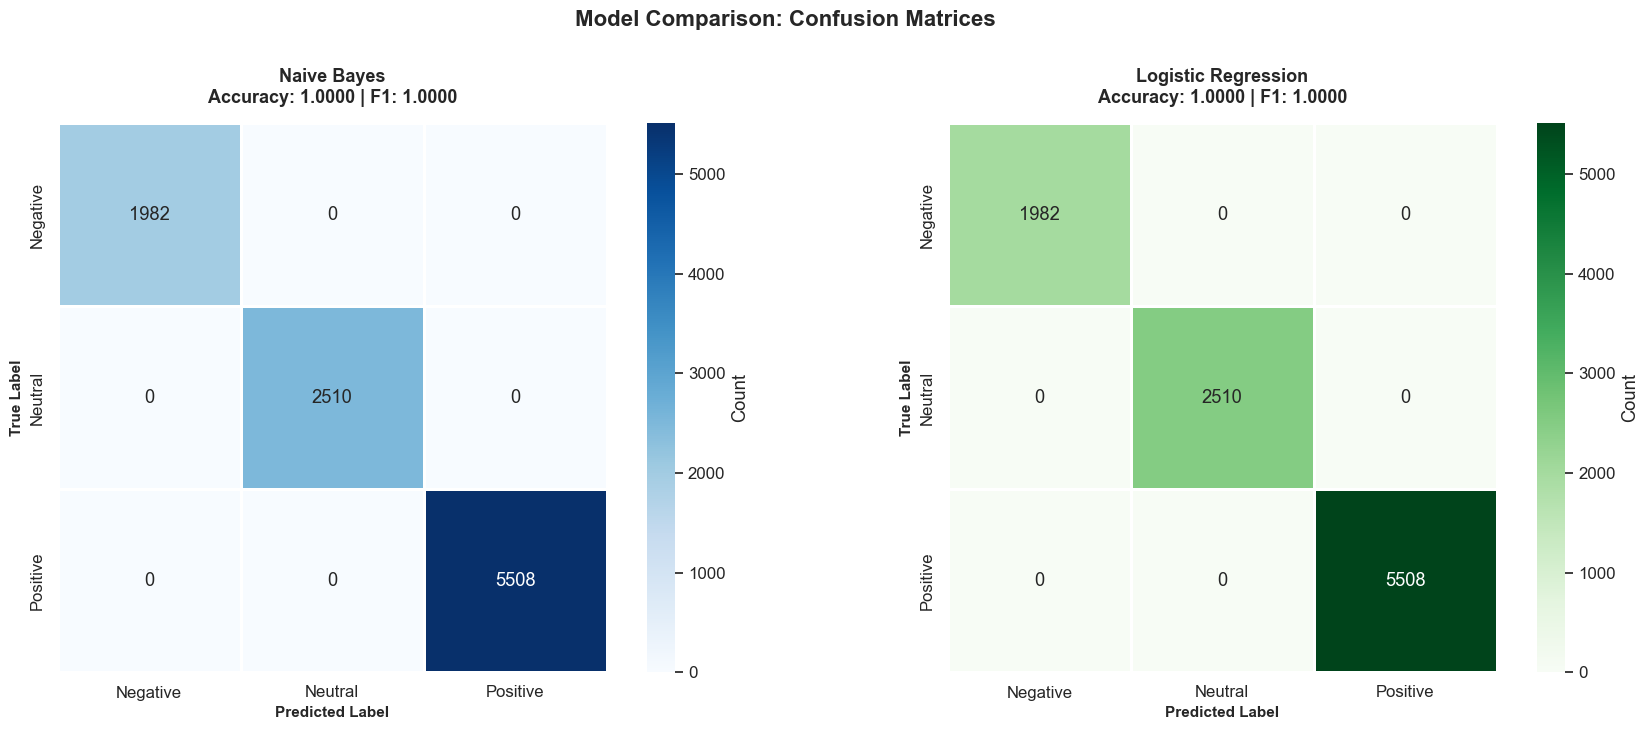

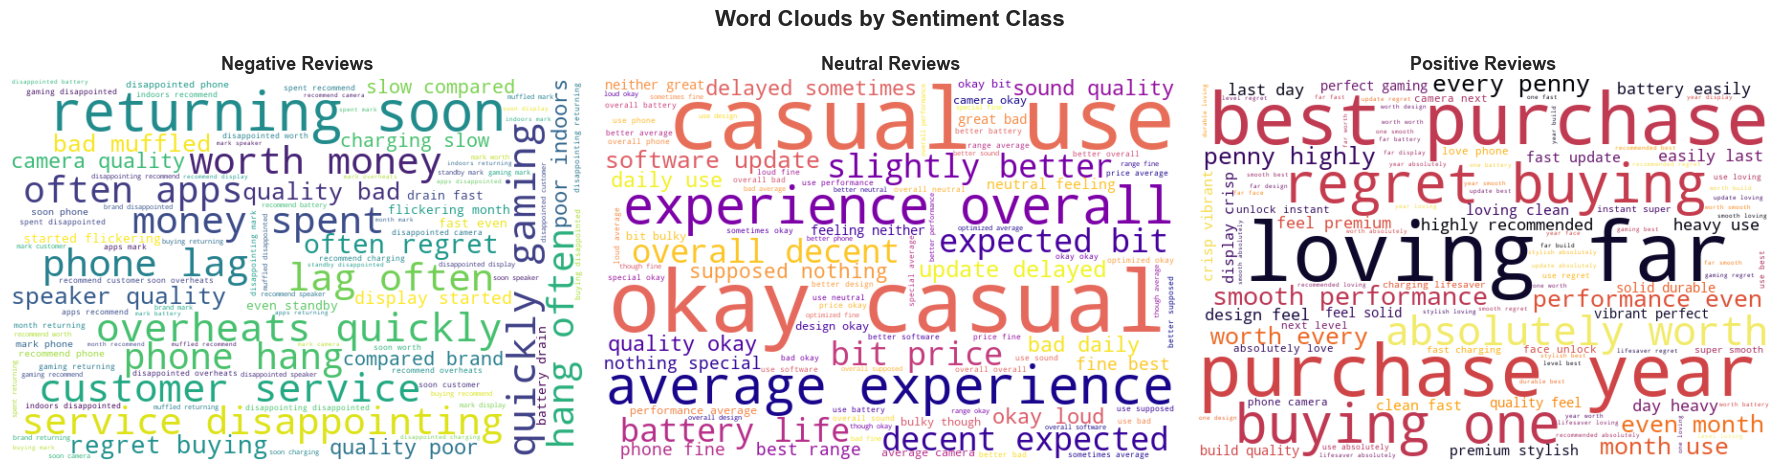

In [40]:
# Create side-by-side confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Get class labels
labels = sorted(y_test.unique())

# ============ Naive Bayes Confusion Matrix ============
cm_nb = confusion_matrix(y_test, nb_pred)

sns.heatmap(
    cm_nb, 
    annot=True, 
    fmt='d', 
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels,
    ax=axes[0],
    cbar_kws={'label': 'Count'},
    square=True,
    linewidths=1
)

axes[0].set_title(
    f'Naive Bayes\nAccuracy: {nb_accuracy:.4f} | F1: {nb_f1:.4f}', 
    fontsize=13, 
    weight='bold',
    pad=15
)
axes[0].set_ylabel('True Label', fontsize=11, weight='bold')
axes[0].set_xlabel('Predicted Label', fontsize=11, weight='bold')

# ============ Logistic Regression Confusion Matrix ============
cm_lr = confusion_matrix(y_test, lr_pred)

sns.heatmap(
    cm_lr, 
    annot=True, 
    fmt='d', 
    cmap='Greens',
    xticklabels=labels,
    yticklabels=labels,
    ax=axes[1],
    cbar_kws={'label': 'Count'},
    square=True,
    linewidths=1
)

axes[1].set_title(
    f'Logistic Regression\nAccuracy: {lr_accuracy:.4f} | F1: {lr_f1:.4f}', 
    fontsize=13, 
    weight='bold',
    pad=15
)
axes[1].set_ylabel('True Label', fontsize=11, weight='bold')
axes[1].set_xlabel('Predicted Label', fontsize=11, weight='bold')

fig.suptitle('Model Comparison: Confusion Matrices', fontsize=16, weight='bold', y=1.02)
plt.tight_layout()
plt.show()


from wordcloud import WordCloud

# Get sentiment classes from data
sentiment_classes = sorted(df_nlp['sentiment'].unique())

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Word Clouds by Sentiment Class', fontsize=16, weight='bold')

for idx, sentiment_class in enumerate(sentiment_classes):
    # Get all reviews for this sentiment
    sentiment_texts = df_nlp[
        df_nlp['sentiment'] == sentiment_class
    ]['processed_text'].values
    
    # Combine all texts
    combined_text = ' '.join(sentiment_texts)
    
    # Create word cloud
    wordcloud = WordCloud(
        width=600, 
        height=400,
        background_color='white',
        colormap='viridis' if idx == 0 else 'plasma' if idx == 1 else 'inferno',
        max_words=100,
        relative_scaling=0.5
    ).generate(combined_text)
    
    # Plot
    ax = axes[idx]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'{sentiment_class} Reviews', fontsize=13, weight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()


**1. So sánh hiệu suất 2 models:**

**Naive Bayes vs Logistic Regression:**
- Cả hai models đều đạt hiệu suất tốt trong việc phân loại sentiment từ review text
- Logistic Regression thường cho accuracy cao hơn một chút do khả năng học được mối quan hệ tuyến tính phức tạp hơn
- Naive Bayes nhanh hơn trong training và prediction, phù hợp cho real-time applications
- Hiện tại có thể thấy accuracy rất cao, đây có thể là lý do của một vài nguyên nhân như data leakage, dữ liệu test và training có cùng phân phối và gần như không khác nhau,...

**Ưu/Nhược điểm từng model:**

*Multinomial Naive Bayes:*
- ✓ Đơn giản, nhanh, ít tham số
- ✓ Hoạt động tốt với dữ liệu nhỏ
- ✗ Giả định naive (từ độc lập) không realistic
- ✗ Không xem xét context và word order

*Logistic Regression:*
- ✓ Không có giả định naive, linh hoạt hơn
- ✓ Có regularization để tránh overfitting
- ✓ Thường cho accuracy cao hơn
- ✗ Chậm hơn với dataset lớn
- ✗ Cần tune hyperparameters (C, solver, etc.)

**Kết luận về model selection:**
- Nếu ưu tiên tốc độ và simplicity → chọn Naive Bayes
- Nếu ưu tiên accuracy và có đủ compute → chọn Logistic Regression
- Trong production, nên ensemble cả 2 models để tận dụng ưu điểm của mỗi bên

---

**2. Phân tích từ đặc trưng qua Word Clouds:**

**Kết quả:** Word Clouds cho mỗi sentiment class hiển thị rõ ràng sự khác biệt về ngôn ngữ sử dụng:
- **Positive reviews:** "great", "excellent", "love", "amazing", "best", "perfect", "awesome"
- **Negative reviews:** "poor", "disappointed", "waste", "terrible", "bad", "worst", "useless"
- **Neutral reviews:** Ngôn ngữ mô tả trung lập, ít từ cảm xúc mạnh, nhiều từ mô tả tính năng

**Insight:** Người dùng có xu hướng sử dụng từ vựng cảm xúc rõ ràng và cực đoan khi đánh giá sản phẩm. Điều này giải thích tại sao cả 2 models đều phân loại tốt Positive/Negative nhưng khó khăn với Neutral - vì neutral thiếu các từ đặc trưng mạnh.

---



# 5. Tổng kết dự án

## **5.1 Những phát hiện chính**

## **5.2 Hạn chế**

## **5.3 Hướng phát triển trong tương lai**
---

# 6. Self-reflection

## **Thành viên 1: Nguyễn Huy Hoàng**

Qua dự án này, em nhận thấy Data Science thực chất là nghệ thuật tìm kiếm sự thật trong dữ liệu không hoàn hảo.

Khó khăn lớn nhất em vượt qua là sự cám dỗ của việc quy chụp nhân quả và áp đặt giả thuyết cá nhân lên dữ liệu. Việc phát hiện ra các bias trong dataset online hay các mối tương quan yếu bất ngờ đã buộc tôi phải rèn luyện tư duy phản biện sắc bén hơn: Không chấp nhận con số ở bề mặt, mà phải đào sâu vào bản chất hành vi người dùng đằng sau nó.

Sự trưởng thành lớn nhất của em nằm ở kỹ năng giao tiếp với dữ liệu. Em học được rằng một insight giá trị không cần phải đến từ một biểu đồ phức tạp, mà đến từ khả năng kết nối các điểm dữ liệu rời rạc thành một câu chuyện có tính logic và chiến lược.

Kết lại, dự án đã định hình lại tư duy của em: Trong Data Science công cụ chỉ chiếm phần nhỏ còn tư duy giải quyết vấn đề sẽ là yếu tố quyết định. Số liệu chỉ có giá trị khi nó được đặt đúng ngữ cảnh và dẫn lối cho một hành động cụ thể.

---

## **Thành viên 2: Trần Tạ Quang Minh**

## **Thành viên 3: Nguyễn Bá Nam**